In [1]:
! pip install graphrole

     |████████████████████████████████| 14.5MB 261kB/s 
     |████████████████████████████████| 1.6MB 34.0MB/s 
     |████████████████████████████████| 6.8MB 30.8MB/s 
     |████████████████████████████████| 25.9MB 1.7MB/s 
     |████████████████████████████████| 10.5MB 25.4MB/s 
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.19.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: networkx 2.5.1
    Uninstalling networkx-2.5.1:
      Successfully uninstalled networkx-2.5.1
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Found existing install

In [2]:
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [3]:
meta = pd.read_json('/content/drive/MyDrive/skku/2021-1 Data Mining/dm_fin_2021/fandom_meta_2018.json')
nodes = pd.read_csv('/content/drive/MyDrive/skku/2021-1 Data Mining/dm_fin_2021/fandom_nodes_2018.csv')
edges = pd.read_csv('/content/drive/MyDrive/skku/2021-1 Data Mining/dm_fin_2021/fandom_edges_2018.csv')
monthly_chart = pd.read_json('/content/drive/MyDrive/skku/2021-1 Data Mining/dm_fin_2021/monthly_chart_2018.json')

### 전체 기간 데이터 분석

####  1. 팬덤 간 도움은 활발한가? 어떤 팬덤이 활발한 도움 활동을 하는가?
##### 1) 팬덤 간 전체 supporting 수 / 팬덤 내 전체 활동 수
- 도움을 준 횟수는 supporting에, supporting을 포함한 전체 활동의 수는 total에 넣고 비율(rate)를 만들어 보기 좋게 데이터 프레임에 넣어 출력했다. 이 결과는 전체 팬덤 활동 중 도움을 주는 비율이 어느 정도인지를 나타낸다. 11월 12월 전체활동을 total로 만들어 nodes 데이터 프레임에 컬럼으로 넣었다.

In [4]:
supporting = np.array(nodes['nov_support'] + nodes['dec_support'])
total = np.array(nodes['nov_post'] + nodes['dec_post'])

In [5]:
nodes['total'] = total

In [6]:
rate = np.array(supporting / total)

In [7]:
rate

array([4.40528634e-02, 9.41990420e-02, 4.75898335e-01, 1.00000000e+00,
       1.16328709e-01, 7.18623482e-01, 1.82078853e-01, 8.97959184e-01,
       0.00000000e+00, 2.55642342e-01, 4.13740458e-01, 2.06643002e-01,
       2.29933110e-01, 2.52574315e-02, 1.90562613e-02, 8.01332992e-01,
       4.84820607e-01, 8.71719257e-01, 1.99158078e-01, 5.23367379e-01,
       3.01652893e-01, 5.43147208e-01, 8.20413437e-01, 9.49319397e-01,
                  nan, 0.00000000e+00, 1.13901097e-01, 1.16564417e-01,
       2.67928086e-01, 0.00000000e+00,            nan, 5.02025454e-01,
       1.25229116e-01, 1.79800604e-01, 8.52469010e-01, 1.68422043e-01,
       2.14285714e-01,            nan, 3.96737979e-01, 5.45454545e-01,
       7.05051287e-01, 2.92987941e-01, 0.00000000e+00, 4.20241639e-02,
       6.76747754e-01, 3.46454183e-01, 9.02118335e-01, 7.20090293e-01,
       4.76168115e-01, 7.84579164e-01, 2.99945900e-01, 4.44444444e-01,
       7.25371120e-02, 5.90766823e-01, 2.88219046e-02,            nan,
      

In [8]:
show_rate = pd.DataFrame(nodes['fandom_id'])
show_rate['fandom_name'] = nodes['fandom_name']
show_rate['rate'] = rate
show_rate

,fandom_id,fandom_name,rate
0,000115sh,KIM SU-HYUN,0.044053
1,010520,MOE GOTO / AKB48,0.094199
2,19980917,KIM DONG-HYUN / MXM,0.475898
3,2PM,2PM,1.000000
4,6kies,SECHSKIES (disbanded),0.116329
...,...,...,...
325,yuminyoung,YU MIN-YOUNG,0.000000
326,yunaminju,KHAN,0.932689
327,yuqi,YUQI / (G)I-dle,0.106238
328,yuseonho,YOO SEON-HO,0.512281


- 2) 타입별 분석(전체, girl, boy)
    - nodes 데이터 프레임에 11월과 12월 supporting을 더한 값을 추가하여 supporting 컬럼을 만들었다. 또한, supported는 target으로 받은 support를 11월, 12월을 합산하여 계산해 supported 컬럼을 만들었다. 그 후, 전체는 그냥 정렬을 해주었고, girl은 type이 0인 것만 모아서, boy는 type이 1인 것만 모아서 내림차순으로 정렬해 10개를 보여주었다.

In [9]:
nodes['supporting'] = supporting
nodes.head()

,fandom_id,fandom_name,nov_post,dec_post,nov_support,dec_support,type,total,supporting
0,000115sh,KIM SU-HYUN,68,159,0,10,0,227,10
1,010520,MOE GOTO / AKB48,1998,1760,179,175,0,3758,354
2,19980917,KIM DONG-HYUN / MXM,718,423,349,194,1,1141,543
3,2PM,2PM,0,1,0,1,1,1,1
4,6kies,SECHSKIES (disbanded),24502,16726,2981,1815,1,41228,4796


In [10]:
#전체
total_supporting = nodes.sort_values(by='supporting', ascending=False)
total_supporting.head(10)

,fandom_id,fandom_name,nov_post,dec_post,nov_support,dec_support,type,total,supporting
308,winner,WINNER,12705,12306,9928,6989,1,25011,16917
301,wannaonego,Wanna One,34394,27178,12462,3574,1,61572,16036
31,btob,BTOB,19656,11695,10918,4821,1,31351,15739
181,lovelyz,Lovelyz,80007,76417,11648,3680,0,156424,15328
209,nuest,NU'EST W,26492,15354,12367,2528,1,41846,14895
292,twice,TWICE,261517,249246,10405,4378,0,510763,14783
183,mamamoo,Mamamoo,42371,29251,11613,2859,0,71622,14472
32,bts,BTS,61144,50699,8185,5821,1,111843,14006
243,roykim,ROY KIM,11544,5310,10425,2724,1,16854,13149
81,gx9,Gugudan,12378,3664,9861,2093,0,16042,11954


In [11]:
nodes['supported'] = [0 for _ in range(len(nodes))]

In [12]:
for i in range(len(edges)):
    for j in range(len(nodes)):
        if nodes['fandom_id'][j] == edges['target'][i]:
            nodes['supported'][j] += (edges['nov_support'][i] + edges['dec_support'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
total_supported = nodes.sort_values(by='supported', ascending=False)
total_supported.head(10)

,fandom_id,fandom_name,nov_post,dec_post,nov_support,dec_support,type,total,supporting,supported
301,wannaonego,Wanna One,34394,27178,12462,3574,1,61572,16036,33609
181,lovelyz,Lovelyz,80007,76417,11648,3680,0,156424,15328,29083
234,real__izo,KIM CHAE-WON / IZ*ONE,53868,25785,8836,2268,0,79653,11104,25459
32,bts,BTS,61144,50699,8185,5821,1,111843,14006,24865
308,winner,WINNER,12705,12306,9928,6989,1,25011,16917,21896
209,nuest,NU'EST W,26492,15354,12367,2528,1,41846,14895,19312
183,mamamoo,Mamamoo,42371,29251,11613,2859,0,71622,14472,18795
67,gf,GFriend,33074,37248,7412,4152,0,70322,11564,14899
124,jsh,JUNG SEUNG-HWAN,8305,2894,7496,2177,1,11199,9673,14437
243,roykim,ROY KIM,11544,5310,10425,2724,1,16854,13149,14267


In [14]:
# girl
is_girl = nodes['type'] == 0
girl_supporting = nodes[is_girl]
girl_supporting = girl_supporting.sort_values(by='supporting', ascending=False)
girl_supporting.head(10)

,fandom_id,fandom_name,nov_post,dec_post,nov_support,dec_support,type,total,supporting,supported
181,lovelyz,Lovelyz,80007,76417,11648,3680,0,156424,15328,29083
292,twice,TWICE,261517,249246,10405,4378,0,510763,14783,12942
183,mamamoo,Mamamoo,42371,29251,11613,2859,0,71622,14472,18795
81,gx9,Gugudan,12378,3664,9861,2093,0,16042,11954,4440
67,gf,GFriend,33074,37248,7412,4152,0,70322,11564,14899
234,real__izo,KIM CHAE-WON / IZ*ONE,53868,25785,8836,2268,0,79653,11104,25459
26,blackpink,BLACKPINK,47674,46074,8215,2463,0,93748,10678,9632
214,ohmygirl,Oh My Girl,34380,30172,6277,2814,0,64552,9091,12335
236,redvelvetreveluv,Red Velvet,25916,23195,5839,2316,0,49111,8155,3591
64,fromis,Fromis 9,23609,26724,5256,2747,0,50333,8003,13957


In [15]:
is_girl = nodes['type'] == 0
girl_supported = nodes[is_girl]
girl_supported = girl_supported.sort_values(by='supported', ascending=False)
girl_supported.head(10)

,fandom_id,fandom_name,nov_post,dec_post,nov_support,dec_support,type,total,supporting,supported
181,lovelyz,Lovelyz,80007,76417,11648,3680,0,156424,15328,29083
234,real__izo,KIM CHAE-WON / IZ*ONE,53868,25785,8836,2268,0,79653,11104,25459
183,mamamoo,Mamamoo,42371,29251,11613,2859,0,71622,14472,18795
67,gf,GFriend,33074,37248,7412,4152,0,70322,11564,14899
64,fromis,Fromis 9,23609,26724,5256,2747,0,50333,8003,13957
292,twice,TWICE,261517,249246,10405,4378,0,510763,14783,12942
214,ohmygirl,Oh My Girl,34380,30172,6277,2814,0,64552,9091,12335
26,blackpink,BLACKPINK,47674,46074,8215,2463,0,93748,10678,9632
262,shitaomiu,MIU SHITAO / AKB48,7327,7314,1101,1102,0,14641,2203,8563
125,jungchaeyeon,JUNG CHAEYEON / DIA,6397,6120,2465,3021,0,12517,5486,6820


In [16]:
# boy
is_boy = nodes['type'] == 1
boy_supporting = nodes[is_boy]
boy_supporting = boy_supporting.sort_values(by='supporting', ascending=False)
boy_supporting.head(10)

,fandom_id,fandom_name,nov_post,dec_post,nov_support,dec_support,type,total,supporting,supported
308,winner,WINNER,12705,12306,9928,6989,1,25011,16917,21896
301,wannaonego,Wanna One,34394,27178,12462,3574,1,61572,16036,33609
31,btob,BTOB,19656,11695,10918,4821,1,31351,15739,11493
209,nuest,NU'EST W,26492,15354,12367,2528,1,41846,14895,19312
32,bts,BTS,61144,50699,8185,5821,1,111843,14006,24865
243,roykim,ROY KIM,11544,5310,10425,2724,1,16854,13149,14267
298,vikon,iKON,9900,6127,7706,2883,1,16027,10589,14245
88,highlight,Highlight,9505,9312,5762,4813,1,18817,10575,7674
124,jsh,JUNG SEUNG-HWAN,8305,2894,7496,2177,1,11199,9673,14437
288,tj3579,HWANG CHI-YEUL,6206,4524,5516,3798,1,10730,9314,3542


In [17]:
is_boy = nodes['type'] == 1
boy_supported = nodes[is_boy]
boy_supported = boy_supported.sort_values(by='supported', ascending=False)
boy_supported.head(10)

,fandom_id,fandom_name,nov_post,dec_post,nov_support,dec_support,type,total,supporting,supported
301,wannaonego,Wanna One,34394,27178,12462,3574,1,61572,16036,33609
32,bts,BTS,61144,50699,8185,5821,1,111843,14006,24865
308,winner,WINNER,12705,12306,9928,6989,1,25011,16917,21896
209,nuest,NU'EST W,26492,15354,12367,2528,1,41846,14895,19312
124,jsh,JUNG SEUNG-HWAN,8305,2894,7496,2177,1,11199,9673,14437
243,roykim,ROY KIM,11544,5310,10425,2724,1,16854,13149,14267
298,vikon,iKON,9900,6127,7706,2883,1,16027,10589,14245
137,kim,Samuel / Samuel,4786,3297,3401,2227,1,8083,5628,13884
4,6kies,SECHSKIES (disbanded),24502,16726,2981,1815,1,41228,4796,13565
31,btob,BTOB,19656,11695,10918,4821,1,31351,15739,11493


- 3) 소속사 별 분석(소속 가수들 정보 합계)
    - 소속사 별로 어떤 그룹이 supporting과 supported가 많은지 알아보도록 하겠다. meta를 set형태로 바꾸어 중복이 없게끔 만든 다음, 소속사에 맞게 nodes에 있는 supporting과 supported 값을 더해주어 데이터 프레임을 만들었다.
  결과를 보면 supporting과 supported 모두 대형기획사들이 많이 도움을 주고 받는 것을 알 수 있다. 3대 기획사뿐만 아니라 큐브, 스윙, 플레디스, 울림, 오프더레코드 등도 꽤 잘나가는 중소기획사라는 것을 보면, 좋은 기획사에서 나온 아티스트들이 인기도 많이 끌고 팬덤이 도움도 많이 주고 받는다는 것을 알 수 있다.

In [18]:
agent_support = pd.DataFrame(set(meta['agent']))
agent_support.columns = ['agent']
agent_support['supporting'] = [0 for _ in range(len(agent_support))]
agent_support['supported'] = [0 for _ in range(len(agent_support))]

In [19]:
agent_support.head()

,agent,supporting,supported
0,Cube Entertainment,0,0
1,Mystic Entertainment,0,0
2,Major 9,0,0
3,Bace Camp Studio.,0,0
4,Plan A Entertainment,0,0


In [20]:
for i in range(len(nodes)):
    for j in range(len(meta)):
        if nodes['fandom_id'][i] == meta['fandom_name'][j]:
            agent = meta['agent'][j]
            index = agent_support[agent_support['agent']==agent].index.tolist()
            if index != []:
                agent_support['supporting'][index[0]] += nodes['supporting'][i]
                agent_support['supported'][index[0]] += nodes['supported'][i]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
agent_support.head()

,agent,supporting,supported
0,Cube Entertainment,30991,20990
1,Mystic Entertainment,5269,1952
2,Major 9,449,81
3,Bace Camp Studio.,516,5
4,Plan A Entertainment,2450,1024


In [22]:
# 소속사별 supporting 정렬(많은 순)
agent_supporting = agent_support.sort_values(by='supporting', ascending=False)
agent_supporting.head(10)

,agent,supporting,supported
103,YG Entertainment,67790,81735
60,JYP Entertainment,54025,41464
72,Off The Record,47300,75508
79,Swing Entertainment,41180,73716
14,SM Entertainment,38862,23736
61,PLEDIS Entertainment,38839,43115
0,Cube Entertainment,30991,20990
55,Woollim Entertainment,22780,35219
34,Jellyfish Entertainment,17606,7583
82,Fantagio Music,15853,8202


In [23]:
# 소속사별 supported 정렬(많은 순)
agent_supported = agent_support.sort_values(by='supported', ascending=False)
agent_supported.head(10)

,agent,supporting,supported
103,YG Entertainment,67790,81735
72,Off The Record,47300,75508
79,Swing Entertainment,41180,73716
61,PLEDIS Entertainment,38839,43115
60,JYP Entertainment,54025,41464
55,Woollim Entertainment,22780,35219
93,Big Hit Entertainment,14006,24865
14,SM Entertainment,38862,23736
0,Cube Entertainment,30991,20990
89,AKS,8554,19646


#### 2. 팬덤 활동이 많은 그룹이 도움을 주고 받는 데에도 활발한가?
- 두 방법으로 correlation을 측정하기 위해서 scipy로부터 stats를 import해주었다. 또한, total에는 팬덤이 하는 전체 활동을 담고, support(ing과 ed를 합친 total), supporting과 supported를 데이터 프레임으로 만들어주었다. fan_activity는 total에서 support를 빼서 도움을 주고 받는 것을 제외하고 자신의 팬덤에 대한 활동만을 말한다. 팬덤활동과 도움을 주고 받는 것이 어떤 상관관계가 있는지 두 가지 측정방법을 통해 알아보았다.

In [24]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
total = nodes['nov_post'] + nodes['dec_post']
support = nodes['supporting'] + nodes['supported']
fan_activity = total - support

In [26]:
# total = fan_activity + support
# support = supporting + supported
# 주목할 관계 1. fan_activity & support
#            2. fan_activity & supporting
#            3. fan_activity & supported

correlation = pd.concat([total, fan_activity, support, nodes['supporting'], nodes['supported']], axis=1)
correlation.columns = ['total', 'fan_activity', 'support', 'supporting', 'supported']
correlation.head()

,total,fan_activity,support,supporting,supported
0,227,211,16,10,6
1,3758,3227,531,354,177
2,1141,481,660,543,117
3,1,0,1,1,0
4,41228,22867,18361,4796,13565


- Pearson correlation을 활용해서 측정하고 해석하라

In [27]:
corr= stats.pearsonr(correlation.fan_activity, correlation.support)
corr_ing= stats.pearsonr(correlation.fan_activity, correlation.supporting)
corr_ed = stats.pearsonr(correlation.fan_activity, correlation.supported)

print(corr)
print(corr_ing)
print(corr_ed)

(0.27995666355121435, 2.3394964980954583e-07)
(0.2804804387379604, 2.2165391827892409e-07)
(0.2607994116555343, 1.562635281367124e-06)


In [28]:
corr_list = correlation.corr(method='pearson')
corr_list

,total,fan_activity,support,supporting,supported
total,1.000000,0.977156,0.477587,0.466512,0.453780
fan_activity,0.977156,1.000000,0.279957,0.280480,0.260799
support,0.477587,0.279957,1.000000,0.947807,0.971655
supporting,0.466512,0.280480,0.947807,1.000000,0.845567
supported,0.453780,0.260799,0.971655,0.845567,1.000000


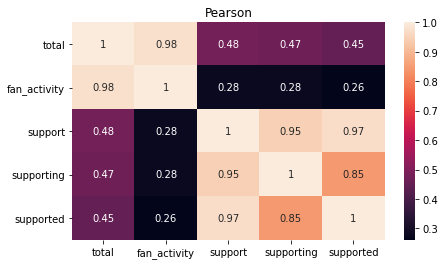

In [29]:
plt.figure(figsize=(7,4))
plt.title('Pearson')
sns.heatmap(corr_list, annot=True)
plt.show()

 - 2. Spearman rank correlation을 활용해서 측정하고 해석하라

In [30]:
rho = stats.spearmanr(correlation.fan_activity, correlation.support)
rho_ing = stats.spearmanr(correlation.fan_activity, correlation.supporting)
rho_ed = stats.spearmanr(correlation.fan_activity, correlation.supported)

print(rho)
print(rho_ing)
print(rho_ed)

SpearmanrResult(correlation=0.05722574186130377, pvalue=0.29998656440527915)
SpearmanrResult(correlation=0.05320196018090462, pvalue=0.3353082669701418)
SpearmanrResult(correlation=0.05686523656152441, pvalue=0.30304654073433407)


In [31]:
rho_s = correlation.corr(method='spearman')
rho_s

,total,fan_activity,support,supporting,supported
total,1.000000,0.505816,0.811492,0.797505,0.792692
fan_activity,0.505816,1.000000,0.057226,0.053202,0.056865
support,0.811492,0.057226,1.000000,0.985618,0.967914
supporting,0.797505,0.053202,0.985618,1.000000,0.924705
supported,0.792692,0.056865,0.967914,0.924705,1.000000


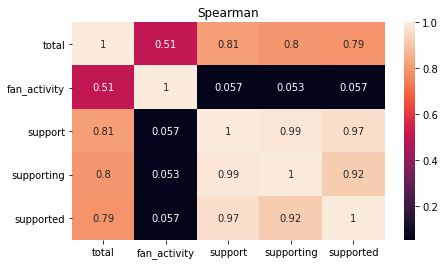

In [32]:
plt.figure(figsize=(7,4))
plt.title('Spearman')
sns.heatmap(rho_s, annot=True)
plt.show()

#### 3. 다음의 가설이 타당한지 를 이용하여 분석하라
- 먼저, 걸그룹과 보이그룹간의 독립성이 있으므로 독립표본 t 검정을 실시했다. 다음으로, 각 집단(girl, boy)의 정규성을 검증해야 한다. 표본이 각각 30개 이상이므로 중심 극한 정리에 따라 정규성을 만족한다고 볼 수 있다. 마지막으로, 두 집단간의 등분산성을 검정해야 하는데, p가 0.05보다 커야 한다.


In [33]:
np.random.seed(12345678)

In [34]:
is_girl = nodes['type'] == 0
is_girl = nodes[is_girl]
girl_ed = np.array(is_girl['supported'])
girl_ing = np.array(is_girl['supporting'])

In [35]:
is_boy = nodes['type'] == 1
is_boy = nodes[is_boy]
boy_ed = np.array(is_boy['supported'])
boy_ing = np.array(is_boy['supporting'])

- 1) 
- H_0: supported . 걸그룹과 보이그룹 간 활동 정도 차이가 없다
- H_1: supported . 걸그룹과 보이그룹 간 활동 정도 차이가 있다

In [36]:
# 등분산 검정
stats.bartlett(girl_ed, boy_ed) # p가 0.05 미만이므로 두 집단의 분산 동일하지 않음

BartlettResult(statistic=5.306391970993222, pvalue=0.021247315204431797)

In [37]:
# independent t-test
stats.ttest_ind(girl_ed, boy_ed, equal_var=False) #p가 유의수준 0.05보다 크므로 걸그룹 보이그룹 간 supported 활동 정도 차이가 없음

Ttest_indResult(statistic=-1.4910443090233123, pvalue=0.1369503086165949)

In [38]:
# 평균 계산
girl_ed_mean = np.mean(girl_ed)
boy_ed_mean = np.mean(boy_ed)

# 표준편차
girl_ed_std = np.std(girl_ed)
boy_ed_std = np.std(boy_ed)

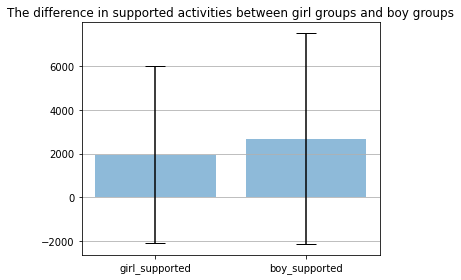

In [39]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(np.arange(2), (girl_ed_mean, boy_ed_mean),
       yerr = [girl_ed_std, boy_ed_std],
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_xticks(np.arange(2))
ax.set_xticklabels(['girl_supported', 'boy_supported'])
ax.set_title('The difference in supported activities between girl groups and boy groups')
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

- 2)
- H_0: supporting . 걸그룹과 보이그룹 간 활동 정도 차이가 없다
- H_1: supporting . 걸그룹과 보이그룹 간 활동 정도 차이가 있다

In [40]:
# 등분산 검정
stats.bartlett(girl_ing, boy_ing) # p가 0.05 이상이므로 두 집단의 분산 동일함

BartlettResult(statistic=3.446449940503455, pvalue=0.06338778124164732)

In [41]:
# independent t-test
stats.ttest_ind(girl_ing, boy_ing, equal_var=True) #pvalue값이 유의수준 0.05보다 크므로 걸그룹 보이그룹 간 supporting 활동 정도 차이가 없음

Ttest_indResult(statistic=-1.33823756824641, pvalue=0.18174595573552438)

In [42]:
# 평균 계산
girl_ing_mean = np.mean(girl_ing)
boy_ing_mean = np.mean(boy_ing)

# 표준편차
girl_ing_std = np.std(girl_ing)
boy_ing_std = np.std(boy_ing)

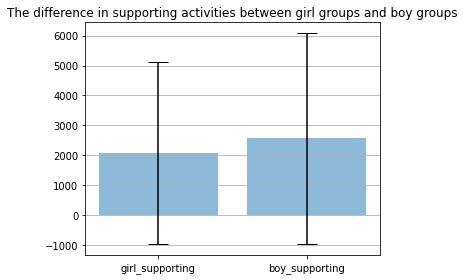

In [43]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(np.arange(2), (girl_ing_mean, boy_ing_mean),
       yerr = [girl_ing_std, boy_ing_std],
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_xticks(np.arange(2))
ax.set_xticklabels(['girl_supporting', 'boy_supporting'])
ax.set_title('The difference in supporting activities between girl groups and boy groups')
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

### 월별 데이터 분석


##### 4. 팬덤 도움 그래프를 생성하고 분석하라

- 1) 전체 및 월별 팬덤 도움 (directed/weighted) 그래프 G = (V, E, W)를 
생성하라 (G0: 전체 활동 그래프, G1: 11월 그래프 , G2: 12월 그래프)
    - node V : fandom
    - node attributes: agent, debut year, gender type
    - edge E : fandom > fandom (supporting)
    - weight W : 해당 월의 도움 수 (의미 있는 edge만 포함하기 위해서 
상위 1% weight인 edge만 남기고 나머지 edge는 filtering out)

- networkx를 사용하여 방향과 가중치가 있는 그래프를 만들어 주었다. 먼저, 주어진 가중치인 support 값을 모두 집어넣어 그래프를 만들고, 그 가중치 값이 높은 순으로 해서 상위 1%에 해당하는 가중치 값을 기억한 다음, 그 값보다 큰 가중치들만 남고 나머지는 filtering out했다. 필터 처리된 것을 이용하여 그래프를 다시 만들어 수정했다. 나와있는 조건을 지켜 그래프를 만들었다. G1과 G2도 같은 방법으로 만들었다.

In [44]:
! pip install networkx
import networkx as nx

In [45]:
#G0

G0 = nx.DiGraph()
G0.add_nodes_from(list(nodes['fandom_id']))

In [46]:
G0.nodes

NodeView(('000115sh', '010520', '19980917', '2PM', '6kies', 'Jessica', 'LimChangJung', 'ace5', 'acejun', 'ahnhyungsub', 'akdong', 'anyujin', 'aoa', 'apink', 'april', 'astro', 'astromj', 'b1a4', 'baejinyoung', 'baekhyun', 'bap', 'ben', 'berrygood', 'bigbang', 'bigjaejun', 'binhjleehjh', 'blackpink', 'blockb', 'boa', 'boysingroove14', 'boysrepublic5', 'btob', 'bts', 'buzz', 'ch_freemonth', 'chaeyaena', 'chan', 'chukjungha', 'chungha', 'clc', 'cmg', 'cosmicgirl', 'daewon', 'dahyeon', 'day6', 'dickpunks', 'dmlwlsska', 'doakim', 'doitamazing7', 'dongbang_new', 'dongho', 'dreamcatcher', 'ej', 'elris', 'erii', 'eunbinyoon', 'eunjiwon', 'eunyeong', 'exid', 'exo_new', 'feeldog', 'finkl', 'forestella', 'fortediquattro', 'fromis', 'frommeg', 'ftisland', 'gf', 'girllaboum', 'girlsday', 'girlsgeneration_new', 'girlsofthemonth', 'god', 'godgayoung', 'goldenchild', 'gooddayjiwon', 'got7', 'got7vlive', 'guckkasten', 'gungun', 'gunmin', 'gx9', 'gyuri', 'hanchowon', 'haonkim', 'hby', 'hellovenus', 'high

In [47]:
G0.add_edges_from([(edges['source'][i], edges['target'][i], {'weight':edges['nov_support'][i]+edges['dec_support'][i]}) for i in range(len(edges))])

In [48]:
G0.edges

OutEdgeView([('000115sh', 'mino0330'), ('010520', 'dongho'), ('010520', 'erii'), ('010520', 'kimnayoung'), ('010520', 'matsui_jurina'), ('010520', 'miyazakimiho'), ('010520', 'murakawabibian'), ('010520', 'murasesae'), ('010520', 'naamin'), ('010520', 'nakanishichiyori'), ('010520', 'satominami'), ('010520', 'shiromamiru'), ('010520', 'shitaomiu'), ('010520', 'takajuri'), ('010520', 'take_miyu'), ('010520', 'ioi'), ('19980917', 'astro'), ('19980917', 'cmg'), ('19980917', 'dmlwlsska'), ('19980917', 'doakim'), ('19980917', 'doitamazing7'), ('19980917', 'dreamcatcher'), ('19980917', 'girllaboum'), ('19980917', 'godgayoung'), ('19980917', 'guckkasten'), ('19980917', 'jihyo'), ('19980917', 'jungchaeyeon'), ('19980917', 'jungsewoon'), ('19980917', 'kgkg'), ('19980917', 'kim'), ('19980917', 'ladiescode'), ('19980917', 'leedaehwi'), ('19980917', 'leeyj'), ('19980917', 'madewg'), ('19980917', 'mamamoo'), ('19980917', 'mumbok'), ('19980917', 'parkwoojin'), ('19980917', 'real__izo'), ('19980917',

In [49]:
print(len(G0.nodes), len(G0.edges)) #엣지 개수 23619 -> 1%만

330 23619


In [50]:
G0.degree()

DiDegreeView({'000115sh': 4, '010520': 36, '19980917': 87, '2PM': 1, '6kies': 315, 'Jessica': 99, 'LimChangJung': 15, 'ace5': 12, 'acejun': 0, 'ahnhyungsub': 295, 'akdong': 23, 'anyujin': 187, 'aoa': 44, 'apink': 144, 'april': 13, 'astro': 328, 'astromj': 151, 'b1a4': 258, 'baejinyoung': 135, 'baekhyun': 146, 'bap': 8, 'ben': 14, 'berrygood': 302, 'bigbang': 304, 'bigjaejun': 0, 'binhjleehjh': 0, 'blackpink': 375, 'blockb': 3, 'boa': 277, 'boysingroove14': 0, 'boysrepublic5': 0, 'btob': 334, 'bts': 362, 'buzz': 333, 'ch_freemonth': 97, 'chaeyaena': 212, 'chan': 7, 'chukjungha': 0, 'chungha': 263, 'clc': 22, 'cmg': 282, 'cosmicgirl': 133, 'daewon': 0, 'dahyeon': 27, 'day6': 341, 'dickpunks': 214, 'dmlwlsska': 252, 'doakim': 356, 'doitamazing7': 319, 'dongbang_new': 263, 'dongho': 283, 'dreamcatcher': 276, 'ej': 33, 'elris': 171, 'erii': 28, 'eunbinyoon': 0, 'eunjiwon': 253, 'eunyeong': 215, 'exid': 179, 'exo_new': 27, 'feeldog': 0, 'finkl': 0, 'forestella': 39, 'fortediquattro': 271, 'f

In [51]:
G0.in_degree()

InDegreeView({'000115sh': 3, '010520': 21, '19980917': 49, '2PM': 0, '6kies': 169, 'Jessica': 41, 'LimChangJung': 3, 'ace5': 3, 'acejun': 0, 'ahnhyungsub': 155, 'akdong': 9, 'anyujin': 93, 'aoa': 14, 'apink': 52, 'april': 2, 'astro': 173, 'astromj': 107, 'b1a4': 130, 'baejinyoung': 63, 'baekhyun': 64, 'bap': 0, 'ben': 4, 'berrygood': 151, 'bigbang': 151, 'bigjaejun': 0, 'binhjleehjh': 0, 'blackpink': 184, 'blockb': 0, 'boa': 114, 'boysingroove14': 0, 'boysrepublic5': 0, 'btob': 147, 'bts': 193, 'buzz': 168, 'ch_freemonth': 25, 'chaeyaena': 118, 'chan': 4, 'chukjungha': 0, 'chungha': 111, 'clc': 0, 'cmg': 144, 'cosmicgirl': 55, 'daewon': 0, 'dahyeon': 16, 'day6': 162, 'dickpunks': 114, 'dmlwlsska': 133, 'doakim': 183, 'doitamazing7': 167, 'dongbang_new': 121, 'dongho': 141, 'dreamcatcher': 148, 'ej': 13, 'elris': 70, 'erii': 11, 'eunbinyoon': 0, 'eunjiwon': 146, 'eunyeong': 127, 'exid': 13, 'exo_new': 4, 'feeldog': 0, 'finkl': 0, 'forestella': 9, 'fortediquattro': 145, 'fromis': 178, 'f

In [52]:
G0.out_degree()

OutDegreeView({'000115sh': 1, '010520': 15, '19980917': 38, '2PM': 1, '6kies': 146, 'Jessica': 58, 'LimChangJung': 12, 'ace5': 9, 'acejun': 0, 'ahnhyungsub': 140, 'akdong': 14, 'anyujin': 94, 'aoa': 30, 'apink': 92, 'april': 11, 'astro': 155, 'astromj': 44, 'b1a4': 128, 'baejinyoung': 72, 'baekhyun': 82, 'bap': 8, 'ben': 10, 'berrygood': 151, 'bigbang': 153, 'bigjaejun': 0, 'binhjleehjh': 0, 'blackpink': 191, 'blockb': 3, 'boa': 163, 'boysingroove14': 0, 'boysrepublic5': 0, 'btob': 187, 'bts': 169, 'buzz': 165, 'ch_freemonth': 72, 'chaeyaena': 94, 'chan': 3, 'chukjungha': 0, 'chungha': 152, 'clc': 22, 'cmg': 138, 'cosmicgirl': 78, 'daewon': 0, 'dahyeon': 11, 'day6': 179, 'dickpunks': 100, 'dmlwlsska': 119, 'doakim': 173, 'doitamazing7': 152, 'dongbang_new': 142, 'dongho': 142, 'dreamcatcher': 128, 'ej': 20, 'elris': 101, 'erii': 17, 'eunbinyoon': 0, 'eunjiwon': 107, 'eunyeong': 88, 'exid': 166, 'exo_new': 23, 'feeldog': 0, 'finkl': 0, 'forestella': 30, 'fortediquattro': 126, 'fromis': 

In [53]:
G0_w = np.array(edges['nov_support'] + edges['dec_support'])
G0_w = G0_w[np.argsort(-G0_w)] #내림차순 정렬
G0_w[0:int(G0_w.size * 0.01)]

array([1337., 1306., 1276., 1271., 1171., 1031., 1014.,  968.,  913.,
        911.,  908.,  890.,  875.,  854.,  805.,  800.,  776.,  768.,
        765.,  760.,  759.,  751.,  751.,  748.,  746.,  735.,  728.,
        725.,  723.,  712.,  710.,  705.,  705.,  704.,  699.,  695.,
        694.,  688.,  686.,  682.,  668.,  666.,  666.,  658.,  657.,
        655.,  653.,  652.,  651.,  649.,  648.,  648.,  644.,  644.,
        641.,  629.,  623.,  621.,  619.,  614.,  612.,  609.,  606.,
        604.,  601.,  600.,  591.,  588.,  582.,  579.,  575.,  570.,
        567.,  563.,  562.,  560.,  558.,  554.,  538.,  535.,  533.,
        524.,  522.,  519.,  513.,  513.,  508.,  503.,  502.,  500.,
        499.,  487.,  484.,  484.,  481.,  480.,  479.,  478.,  478.,
        477.,  475.,  469.,  467.,  464.,  464.,  458.,  458.,  458.,
        452.,  447.,  446.,  443.,  442.,  440.,  438.,  436.,  436.,
        432.,  431.,  431.,  430.,  429.,  428.,  428.,  426.,  426.,
        425.,  424.,

In [54]:
stand_w = G0_w[int(G0_w.size * 0.01)] #상위 1%가 되는 edge의 degree값

In [55]:
filter_edges = filter(lambda e: True if e[2]['weight']>=stand_w else False, G0.edges(data=True)) #그 값 이상이면 통과 아니면 엣지 탈락

In [56]:
# G0 filter_edges 고려하여 다시 만들었음
G0 = nx.DiGraph()
G0.add_nodes_from(list(nodes['fandom_id']))
G0.add_edges_from(filter_edges)

In [57]:
print(len(G0.nodes), len(G0.edges)) #엣지가 줄어든 모습

330 238


In [58]:
G0.edges

OutEdgeView([('6kies', 'wannaonego'), ('ahnhyungsub', 'wannaonego'), ('ahnhyungsub', 'winner'), ('apink', 'winner'), ('bigbang', 'blackpink'), ('bigbang', 'fromis'), ('bigbang', 'jsh'), ('bigbang', 'wannaonego'), ('bigbang', 'winner'), ('blackpink', 'bts'), ('blackpink', 'fromis'), ('blackpink', 'roykim'), ('blackpink', 'wannaonego'), ('blackpink', 'winner'), ('btob', '6kies'), ('btob', 'bts'), ('btob', 'day6'), ('btob', 'fromis'), ('btob', 'kim'), ('btob', 'lovelyz'), ('btob', 'mamamoo'), ('btob', 'nuest'), ('btob', 'real__izo'), ('btob', 'wannaonego'), ('btob', 'winner'), ('bts', 'day6'), ('bts', 'fromis'), ('bts', 'jsh'), ('bts', 'lovelyz'), ('bts', 'mamamoo'), ('bts', 'ohmygirl'), ('bts', 'real__izo'), ('bts', 'roykim'), ('bts', 'twice'), ('bts', 'wannaonego'), ('buzz', 'wannaonego'), ('ch_freemonth', 'nuest'), ('ch_freemonth', 'ohmygirl'), ('ch_freemonth', 'real__izo'), ('ch_freemonth', 'roykim'), ('ch_freemonth', 'wannaonego'), ('chungha', 'ohmygirl'), ('chungha', 'real__izo'), (

In [59]:
print(G0.degree())
print(G0.in_degree())
print(G0.out_degree())

[('000115sh', 0), ('010520', 0), ('19980917', 0), ('2PM', 0), ('6kies', 4), ('Jessica', 0), ('LimChangJung', 0), ('ace5', 0), ('acejun', 0), ('ahnhyungsub', 3), ('akdong', 0), ('anyujin', 0), ('aoa', 0), ('apink', 2), ('april', 0), ('astro', 0), ('astromj', 0), ('b1a4', 0), ('baejinyoung', 0), ('baekhyun', 0), ('bap', 0), ('ben', 0), ('berrygood', 0), ('bigbang', 6), ('bigjaejun', 0), ('binhjleehjh', 0), ('blackpink', 7), ('blockb', 0), ('boa', 0), ('boysingroove14', 0), ('boysrepublic5', 0), ('btob', 14), ('bts', 25), ('buzz', 1), ('ch_freemonth', 12), ('chaeyaena', 0), ('chan', 0), ('chukjungha', 0), ('chungha', 2), ('clc', 0), ('cmg', 0), ('cosmicgirl', 0), ('daewon', 0), ('dahyeon', 0), ('day6', 8), ('dickpunks', 0), ('dmlwlsska', 1), ('doakim', 0), ('doitamazing7', 0), ('dongbang_new', 0), ('dongho', 0), ('dreamcatcher', 0), ('ej', 0), ('elris', 0), ('erii', 0), ('eunbinyoon', 0), ('eunjiwon', 0), ('eunyeong', 0), ('exid', 0), ('exo_new', 0), ('feeldog', 0), ('finkl', 0), ('forest

In [60]:
nx.set_node_attributes(G0, meta.set_index('fandom_name')['agent'], 'agent')
nx.set_node_attributes(G0, meta.set_index('fandom_name')['year(debut)'], 'debut year')
nx.set_node_attributes(G0, nodes.set_index('fandom_id')['type'], 'gender type')

In [61]:
G0.nodes.data()

NodeDataView({'000115sh': {'agent': 'Mystic Entertainment', 'debut year': 2017, 'gender type': 0}, '010520': {'agent': 'AKS', 'debut year': 2018, 'gender type': 0}, '19980917': {'agent': 'Brand New Music', 'debut year': 2017, 'gender type': 1}, '2PM': {'agent': 'JYP Entertainment', 'debut year': 2008, 'gender type': 1}, '6kies': {'agent': 'YG Entertainment', 'debut year': 1997, 'gender type': 1}, 'Jessica': {'agent': 'Coridel Entertainment', 'debut year': 2007, 'gender type': 0}, 'LimChangJung': {'agent': 'NH EMG', 'debut year': 1995, 'gender type': 1}, 'ace5': {'agent': 'Beat Interactive', 'debut year': 2017, 'gender type': 1}, 'acejun': {'agent': 'Beat Interactive', 'debut year': 2017, 'gender type': 1}, 'ahnhyungsub': {'agent': 'Yuehua Entertainment', 'debut year': 2017, 'gender type': 1}, 'akdong': {'agent': 'YG Entertainment', 'debut year': 2014, 'gender type': 0}, 'anyujin': {'agent': 'Off The Record', 'debut year': 2018, 'gender type': 0}, 'aoa': {'agent': 'FNC Entertainment', '

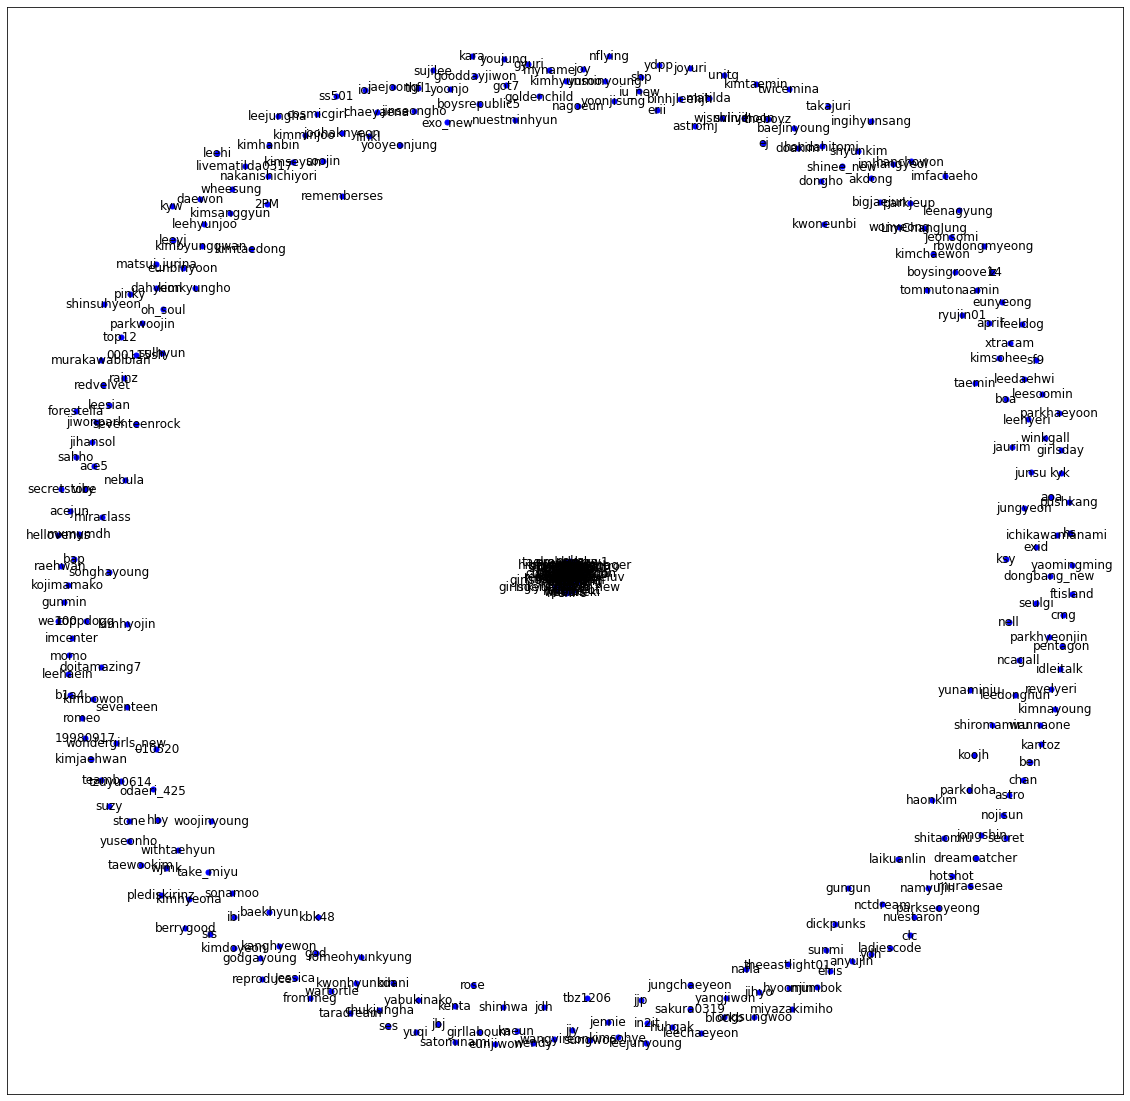

In [62]:
#G0 시각화
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G0, k = 0.15)
nx.draw_networkx(G0,pos, node_size = 25, node_color = 'blue')
plt.show()

In [63]:
# G1

G1 = nx.DiGraph()
G1.add_nodes_from(list(nodes['fandom_id']))
G1.add_edges_from([(edges['source'][i], edges['target'][i], {'weight':edges['nov_support'][i]}) for i in range(len(edges))])

G1_w = np.array(edges['nov_support'])
G1_w = G1_w[np.argsort(-G1_w)]
stand1_w = G1_w[int(G1_w.size * 0.01)]

filter_edges = filter(lambda e: True if e[2]['weight']>=stand1_w else False, G1.edges(data=True))

G1 = nx.DiGraph()
G1.add_nodes_from(list(nodes['fandom_id']))
G1.add_edges_from(filter_edges)

nx.set_node_attributes(G1, meta.set_index('fandom_name')['agent'], 'agent')
nx.set_node_attributes(G1, meta.set_index('fandom_name')['year(debut)'], 'debut year')
nx.set_node_attributes(G1, nodes.set_index('fandom_id')['type'], 'gender type')

In [64]:
print(G1.degree())
print(G1.in_degree())
print(G1.out_degree())

[('000115sh', 0), ('010520', 0), ('19980917', 0), ('2PM', 0), ('6kies', 5), ('Jessica', 0), ('LimChangJung', 0), ('ace5', 0), ('acejun', 0), ('ahnhyungsub', 3), ('akdong', 0), ('anyujin', 1), ('aoa', 0), ('apink', 2), ('april', 0), ('astro', 0), ('astromj', 0), ('b1a4', 0), ('baejinyoung', 0), ('baekhyun', 0), ('bap', 0), ('ben', 0), ('berrygood', 0), ('bigbang', 5), ('bigjaejun', 0), ('binhjleehjh', 0), ('blackpink', 9), ('blockb', 0), ('boa', 1), ('boysingroove14', 0), ('boysrepublic5', 0), ('btob', 12), ('bts', 20), ('buzz', 2), ('ch_freemonth', 13), ('chaeyaena', 0), ('chan', 0), ('chukjungha', 0), ('chungha', 3), ('clc', 0), ('cmg', 0), ('cosmicgirl', 0), ('daewon', 0), ('dahyeon', 0), ('day6', 6), ('dickpunks', 0), ('dmlwlsska', 1), ('doakim', 0), ('doitamazing7', 0), ('dongbang_new', 0), ('dongho', 0), ('dreamcatcher', 0), ('ej', 0), ('elris', 0), ('erii', 0), ('eunbinyoon', 0), ('eunjiwon', 0), ('eunyeong', 0), ('exid', 0), ('exo_new', 0), ('feeldog', 0), ('finkl', 0), ('forest

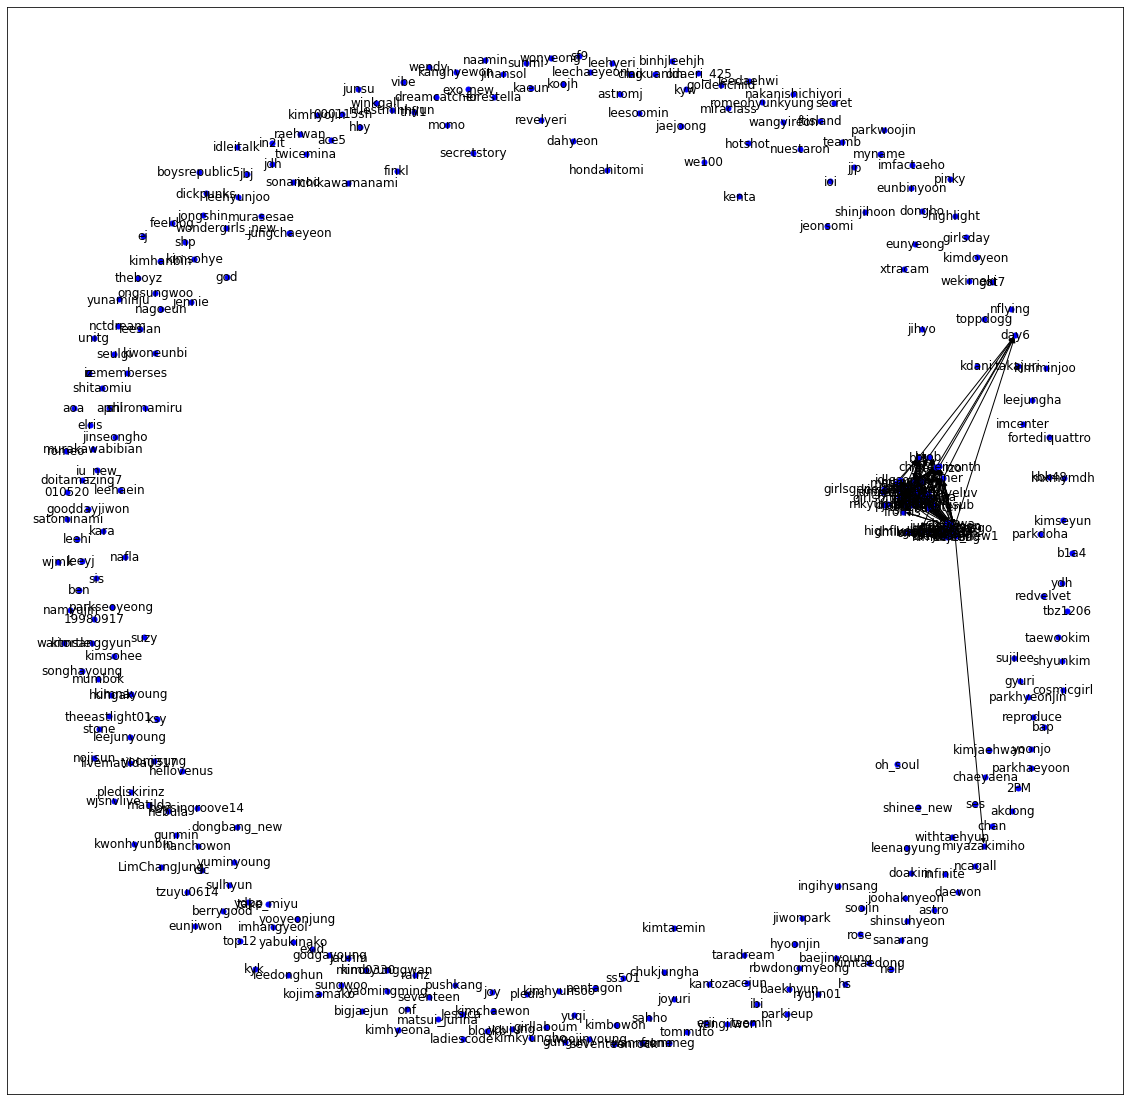

In [65]:
#G1 시각화
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G1, k = 0.15)
nx.draw_networkx(G1, pos, node_size = 25, node_color = 'blue')
plt.show()

In [66]:
# G2

G2 = nx.DiGraph()
G2.add_nodes_from(list(nodes['fandom_id']))
G2.add_edges_from([(edges['source'][i], edges['target'][i], {'weight':edges['dec_support'][i]}) for i in range(len(edges))])

G2_w = np.array(edges['dec_support'])
G2_w = G2_w[np.argsort(-G2_w)]
stand2_w = G2_w[int(G2_w.size * 0.01)]

filter_edges = filter(lambda e: True if e[2]['weight']>=stand2_w else False, G2.edges(data=True))

G2 = nx.DiGraph()
G2.add_nodes_from(list(nodes['fandom_id']))
G2.add_edges_from(filter_edges)

nx.set_node_attributes(G2, meta.set_index('fandom_name')['agent'], 'agent')
nx.set_node_attributes(G2, meta.set_index('fandom_name')['year(debut)'], 'debut year')
nx.set_node_attributes(G2, nodes.set_index('fandom_id')['type'], 'gender type')

In [67]:
print(G2.degree())
print(G2.in_degree())
print(G2.out_degree())

[('000115sh', 0), ('010520', 0), ('19980917', 0), ('2PM', 0), ('6kies', 6), ('Jessica', 0), ('LimChangJung', 0), ('ace5', 0), ('acejun', 0), ('ahnhyungsub', 3), ('akdong', 0), ('anyujin', 0), ('aoa', 0), ('apink', 0), ('april', 0), ('astro', 2), ('astromj', 0), ('b1a4', 1), ('baejinyoung', 0), ('baekhyun', 0), ('bap', 0), ('ben', 0), ('berrygood', 1), ('bigbang', 4), ('bigjaejun', 0), ('binhjleehjh', 0), ('blackpink', 4), ('blockb', 0), ('boa', 0), ('boysingroove14', 0), ('boysrepublic5', 0), ('btob', 11), ('bts', 42), ('buzz', 1), ('ch_freemonth', 0), ('chaeyaena', 0), ('chan', 0), ('chukjungha', 0), ('chungha', 0), ('clc', 0), ('cmg', 0), ('cosmicgirl', 0), ('daewon', 0), ('dahyeon', 0), ('day6', 11), ('dickpunks', 1), ('dmlwlsska', 1), ('doakim', 2), ('doitamazing7', 1), ('dongbang_new', 2), ('dongho', 0), ('dreamcatcher', 0), ('ej', 0), ('elris', 0), ('erii', 0), ('eunbinyoon', 0), ('eunjiwon', 2), ('eunyeong', 0), ('exid', 0), ('exo_new', 0), ('feeldog', 0), ('finkl', 0), ('forest

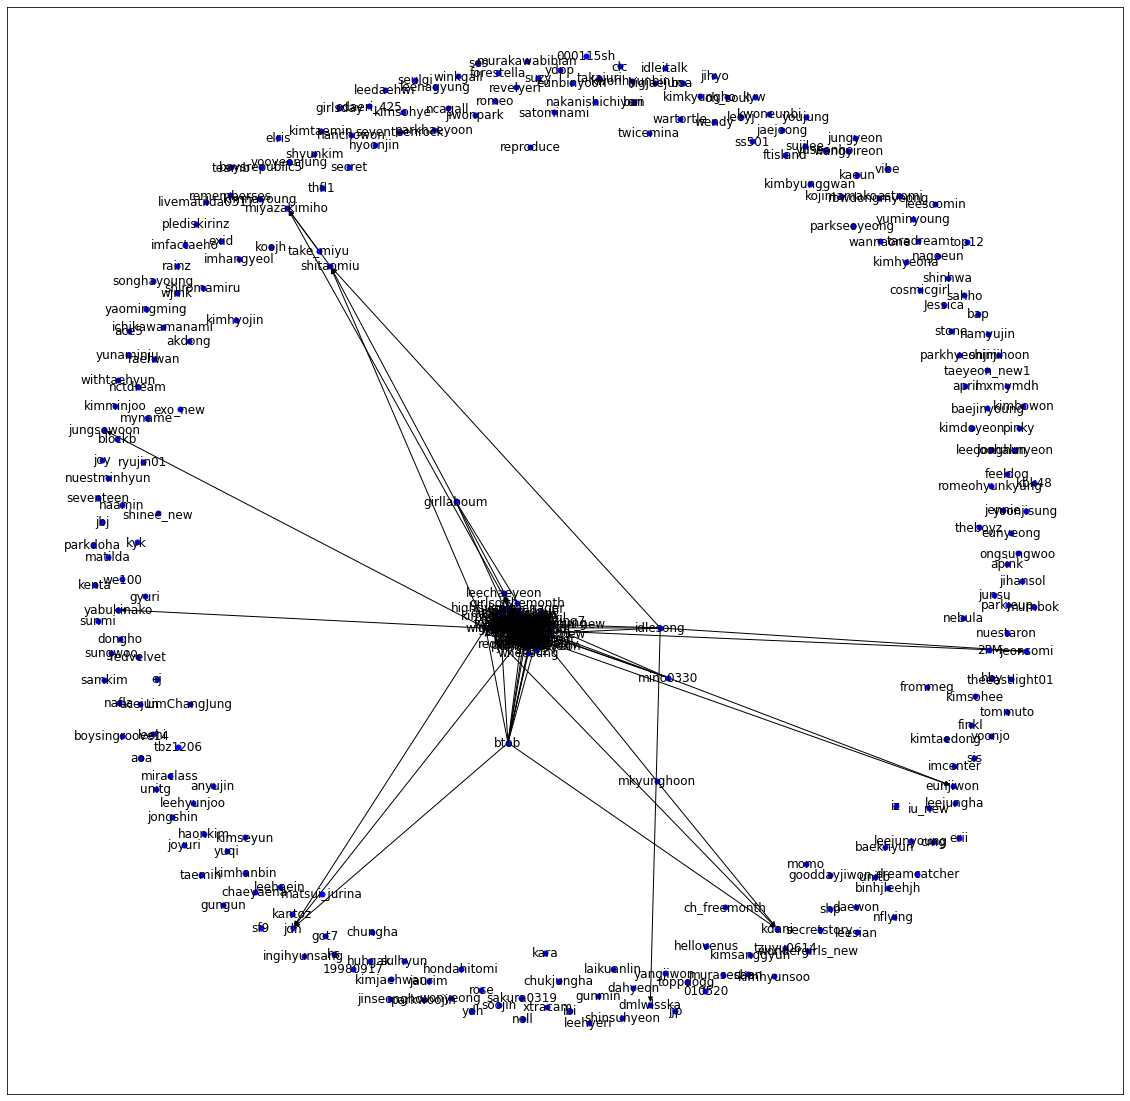

In [68]:
#G2 시각화
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G2, k = 0.15)
nx.draw_networkx(G2, pos, node_size = 25, node_color = 'blue')
plt.show()

- 2) G0의 degree를 바탕으로 Cumulative Distribution Function (CDF)를 
만들고 해석하라
    - CDF는 정규분포의 누적분포함수를 말한다. 따라서 scipy.stats에 있는 norm을 사용할 것이다. G0의 degree를 bincount라는 변수를 통해 살펴보았다. 표본 값을 입력하면 해당 표본 값에 대한 누적확률을 출력한다. bincount는 각 degree 값이 얼마나 있는지를 세어 나타낸 넘파이 배열이다. edges를 1%만 남겨두었기 때문에 degree 값이 0인 경우가 270이나 되었다. 의미있는 edge만을 봐야 하므로 0을 제외하고 계산해주기로 한다. 이를 그래프로 나타내면 이렇게 된다. 편의상 확률밀도함수(PDF)도 함께 나타내었다.

In [69]:
from scipy.stats import norm
import matplotlib.pyplot as plt

In [70]:
bincount = np.array([d for n, d in G0.degree])
bincount = np.bincount(bincount)
bincount

array([270,  22,   4,   5,   2,   2,   2,   2,   1,   3,   1,   0,   1,
         0,   3,   2,   0,   0,   0,   3,   1,   0,   0,   0,   0,   1,
         1,   2,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   1])

In [71]:
bincount = bincount[1:] #0번째는 edge가 없는 것을 의미하기 때문에 제외함

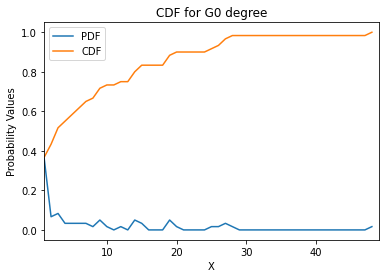

In [72]:
x=np.arange(1,49)
pdf=bincount/np.sum(bincount)
cdf=np.cumsum(pdf)

plt.plot(x,pdf, label="PDF") #확률밀도함수
plt.plot(x,cdf,label="CDF") #누적분포함수
plt.xlim(1,49)
plt.xlabel("X")
plt.ylabel("Probability Values")
plt.title("CDF for G0 degree")
plt.legend()
plt.show()

- 3) G0에서 pagerank 및 degree centrality 기준 top 5 fandom의 정보를 
기술하고 해석하라

In [73]:
def viewer(_dict_data, col_name):
    result = pd.DataFrame().from_dict(_dict_data, orient='index', columns=[col_name])
    return nodes.set_index('fandom_id').join(result, how='right').sort_values(col_name, ascending=False).head(5)

In [74]:
pagerank = nx.pagerank(G0)
pagerank = viewer(pagerank, 'pagerank')
pagerank

,fandom_name,nov_post,dec_post,nov_support,dec_support,type,total,supporting,supported,pagerank
wannaonego,Wanna One,34394,27178,12462,3574,1,61572,16036,33609,0.078265
real__izo,KIM CHAE-WON / IZ*ONE,53868,25785,8836,2268,0,79653,11104,25459,0.051516
lovelyz,Lovelyz,80007,76417,11648,3680,0,156424,15328,29083,0.043661
nuest,NU'EST W,26492,15354,12367,2528,1,41846,14895,19312,0.038913
jsh,JUNG SEUNG-HWAN,8305,2894,7496,2177,1,11199,9673,14437,0.038853


In [75]:
degree_centrality = nx.degree_centrality(G0)
degree_centrality = viewer(degree_centrality, 'degree_centrality')
degree_centrality

,fandom_name,nov_post,dec_post,nov_support,dec_support,type,total,supporting,supported,degree_centrality
wannaonego,Wanna One,34394,27178,12462,3574,1,61572,16036,33609,0.145897
lovelyz,Lovelyz,80007,76417,11648,3680,0,156424,15328,29083,0.085106
nuest,NU'EST W,26492,15354,12367,2528,1,41846,14895,19312,0.082067
winner,WINNER,12705,12306,9928,6989,1,25011,16917,21896,0.082067
real__izo,KIM CHAE-WON / IZ*ONE,53868,25785,8836,2268,0,79653,11104,25459,0.079027


- 4) G0에서 boy->boy, boy->girl, girl->boy, girl->girl 경우의 비율을 각각 
구하여 기술하고 해석하라
    - type_edge에 엣지들을 넣어주고, boy->boy, boy->girl, girl->boy, girl->girl 이 네 경우를 각각 supporting하는 노드와 supported되는 노드의 type(성별)을 찾아 나누어 횟수를 세주었다. 이를 전체와 나누어 계산하여 비율을 나타낼 수 있었다. 

In [76]:
type_edge = list(G0.edges)
type_edge[0:5]

[('6kies', 'wannaonego'),
 ('ahnhyungsub', 'wannaonego'),
 ('ahnhyungsub', 'winner'),
 ('apink', 'winner'),
 ('bigbang', 'blackpink')]

In [77]:
def type_check(type_edge):
    boy_boy, girl_girl, boy_girl, girl_boy = 0, 0, 0, 0
    for i in range(len(type_edge)):
        start = int(nodes[nodes['fandom_id'] == type_edge[i][0]]['type'])
        end = int(nodes[nodes['fandom_id'] == type_edge[i][1]]['type'])
        if start == end:
            if start == 1: #boy->boy
                boy_boy += 1
            else: #girl->girl
                girl_girl += 1
        else:
            if start == 0: #girl->boy
                girl_boy += 1
            else: #boy->girl
                boy_girl += 1
    return boy_boy, girl_girl, boy_girl, girl_boy

In [78]:
boy_boy, girl_girl, boy_girl, girl_boy = type_check(type_edge)

type_total = boy_boy + girl_girl + boy_girl + girl_boy
print(boy_boy/type_total)
print(girl_girl/type_total)
print(boy_girl/type_total)
print(girl_boy/type_total)

0.31932773109243695
0.15966386554621848
0.2647058823529412
0.25630252100840334


##### 5. 각 월별로 생성된 두개의 팬덤 도움 네트워크 G1과 G2를 비교하라

- 1) G1에서는 edge가 있었는데 G2에서는 있거나 없어지는 경우, G1에서는 edge가 없었는데 G2에서는 있거나 없어지는 경우를 테이블에 기술하고 해석하라. 도움이 유지되는 경우가 팬덤 아이돌의 boy, girl 그룹 여부와 관련이 있는가?
    - G1에서의 도움과 G2에서의 도움의 여부를 o1_o2, o1_x2, x1_o2, x1_x2 이렇게 4개의 변수에 저장해주었다.

In [79]:
g1_edges = list(G1.edges)
g2_edges = list(G2.edges)
print(len(g1_edges), len(g2_edges))

237 239


In [80]:
o1_o2 , o1_x2, x1_o2, x1_x2 = [], [], [], []

In [81]:
o1_x2 = g1_edges
for g1 in g1_edges:
    for g2 in g2_edges:
        if g1 == g2:
            o1_o2.append(g1)
            o1_x2.remove(g1)
            break

In [82]:
x1_o2 = g2_edges
for o in o1_o2:
    for g2 in g2_edges:
        if g2 == o:
            x1_o2.remove(g2)
            break

In [83]:
fan = list(nodes['fandom_id'])
for f1 in fan:
    for f2 in fan:
        if f1 != f2:
            if (f1, f2) not in o1_o2:
                x1_x2.append((f1, f2))

In [84]:
# G1-> G2 모든 경우 기술 !!
print(o1_o2)
print(len(o1_o2))
print(o1_x2)
print(len(o1_x2))
print(x1_o2)
print(len(x1_o2))
print(x1_x2)
print(len(x1_x2))

Output hidden; open in https://colab.research.google.com to view.

In [85]:
# 도움이 유지되는 경우 : o1_o2

boy_boy, girl_girl, boy_girl, girl_boy = type_check(o1_o2)

type_total = boy_boy + girl_girl + boy_girl + girl_boy
print(boy_boy/type_total)
print(girl_girl/type_total)
print(boy_girl/type_total)
print(girl_boy/type_total)

0.4
0.12307692307692308
0.2153846153846154
0.26153846153846155


- 2) 네트워크 별 RolX algorithm 기반으로 Graph Role Extraction과 girvan_newman algorithm 기반 Community Detection 분석을 하고, 각각에 대해 의미하는 바를 해석한 후 월별로 그 역할과 그룹이 달라진 팬덤에 대해 분석하라

In [86]:
! pip install graphrole

In [87]:
from pprint import pprint
import seaborn as sns
from graphrole import RecursiveFeatureExtractor, RoleExtractor

In [88]:
# extract features
feature_extractor = RecursiveFeatureExtractor(G1)
features = feature_extractor.extract_features()
print(features)

            in_degree(mean)(mean)(mean)  ...  total_degree
000115sh                        0.00000  ...           0.0
010520                          0.00000  ...           0.0
19980917                        0.00000  ...           0.0
2PM                             0.00000  ...           0.0
6kies                        6236.82001  ...        1425.0
...                                 ...  ...           ...
yuminyoung                      0.00000  ...           0.0
yunaminju                       0.00000  ...           0.0
yuqi                            0.00000  ...           0.0
yuseonho                     6236.82001  ...         241.0
zico                         5932.27660  ...        4756.0

[330 rows x 14 columns]


In [89]:
# assign node roles
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)
node_roles_1 = role_extractor.roles

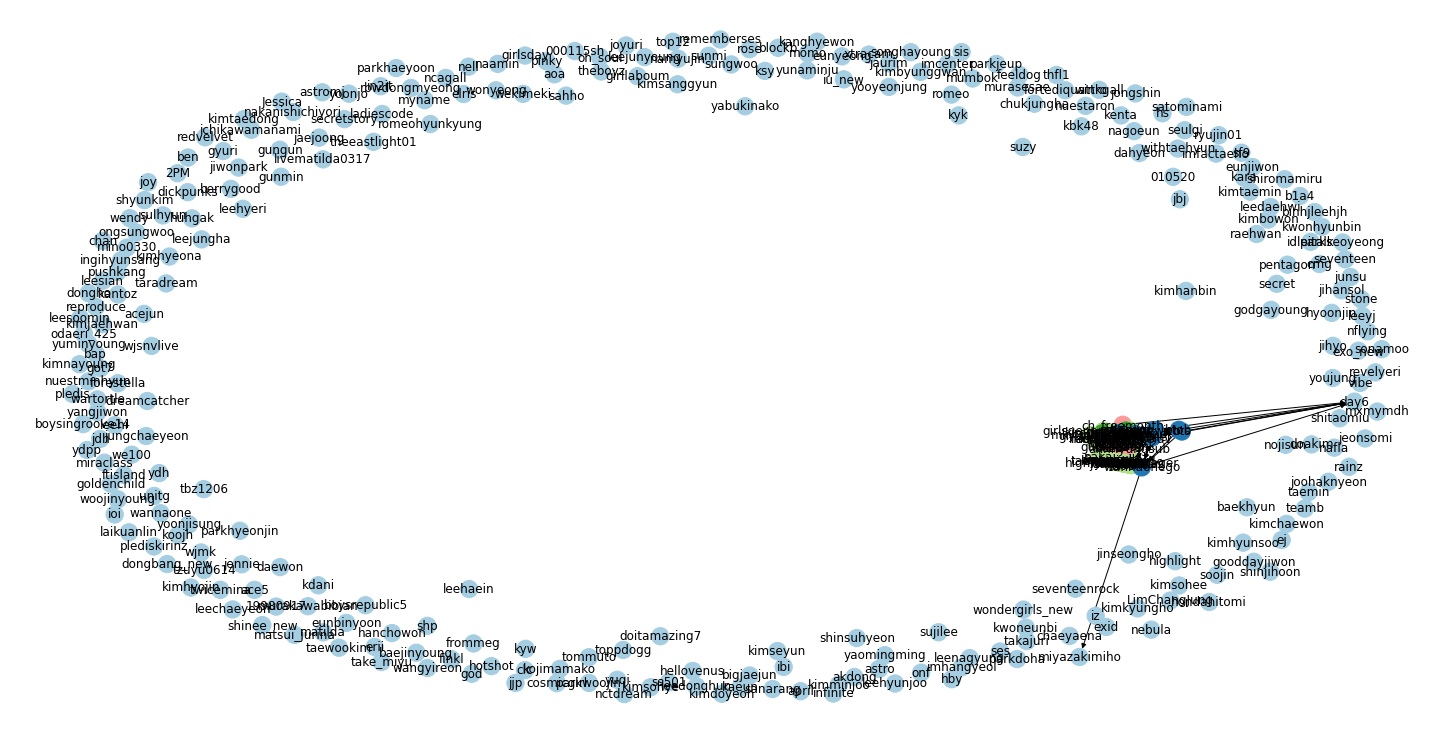

In [90]:
# build color palette for plotting
unique_roles = sorted(set(node_roles_1.values()))
color_map = sns.color_palette('Paired', n_colors=len(unique_roles))
# map roles to colors
role_colors = {role: color_map[i] for i, role in enumerate(unique_roles)}
# build list of colors for all nodes in G
node_colors = [role_colors[node_roles_1[node]] for node in G1.nodes]

# plot graph
plt.figure(figsize=(20,10))
nx.draw(
    G1,
    pos=nx.spring_layout(G1, seed=42),
    with_labels=True,
    node_color=node_colors,
)
plt.show()

In [91]:
print('\nNode role assignments:')
pprint(node_roles_1)

print('\nNode role membership by percentage:')
print(role_extractor.role_percentage.round(2))


Node role assignments:
{'000115sh': 'role_0',
 '010520': 'role_0',
 '19980917': 'role_0',
 '2PM': 'role_0',
 '6kies': 'role_2',
 'Jessica': 'role_0',
 'LimChangJung': 'role_0',
 'ace5': 'role_0',
 'acejun': 'role_0',
 'ahnhyungsub': 'role_2',
 'akdong': 'role_0',
 'anyujin': 'role_2',
 'aoa': 'role_0',
 'apink': 'role_2',
 'april': 'role_0',
 'astro': 'role_0',
 'astromj': 'role_0',
 'b1a4': 'role_0',
 'baejinyoung': 'role_0',
 'baekhyun': 'role_0',
 'bap': 'role_0',
 'ben': 'role_0',
 'berrygood': 'role_0',
 'bigbang': 'role_4',
 'bigjaejun': 'role_0',
 'binhjleehjh': 'role_0',
 'blackpink': 'role_4',
 'blockb': 'role_0',
 'boa': 'role_2',
 'boysingroove14': 'role_0',
 'boysrepublic5': 'role_0',
 'btob': 'role_1',
 'bts': 'role_1',
 'buzz': 'role_2',
 'ch_freemonth': 'role_4',
 'chaeyaena': 'role_0',
 'chan': 'role_0',
 'chukjungha': 'role_0',
 'chungha': 'role_4',
 'clc': 'role_0',
 'cmg': 'role_0',
 'cosmicgirl': 'role_0',
 'daewon': 'role_0',
 'dahyeon': 'role_0',
 'day6': 'role_0

In [92]:
# extract features
feature_extractor = RecursiveFeatureExtractor(G2)
features = feature_extractor.extract_features()
print(features)

            external_edges(mean)(mean)  ...  total_degree
000115sh                      0.000000  ...           0.0
010520                        0.000000  ...           0.0
19980917                      0.000000  ...           0.0
2PM                           0.000000  ...           0.0
6kies                      2149.142857  ...         709.0
...                                ...  ...           ...
yuminyoung                    0.000000  ...           0.0
yunaminju                     0.000000  ...           0.0
yuqi                          0.000000  ...           0.0
yuseonho                      0.000000  ...           0.0
zico                       1960.542063  ...         499.0

[330 rows x 13 columns]


In [93]:
# assign node roles
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)
node_roles_2 = role_extractor.roles

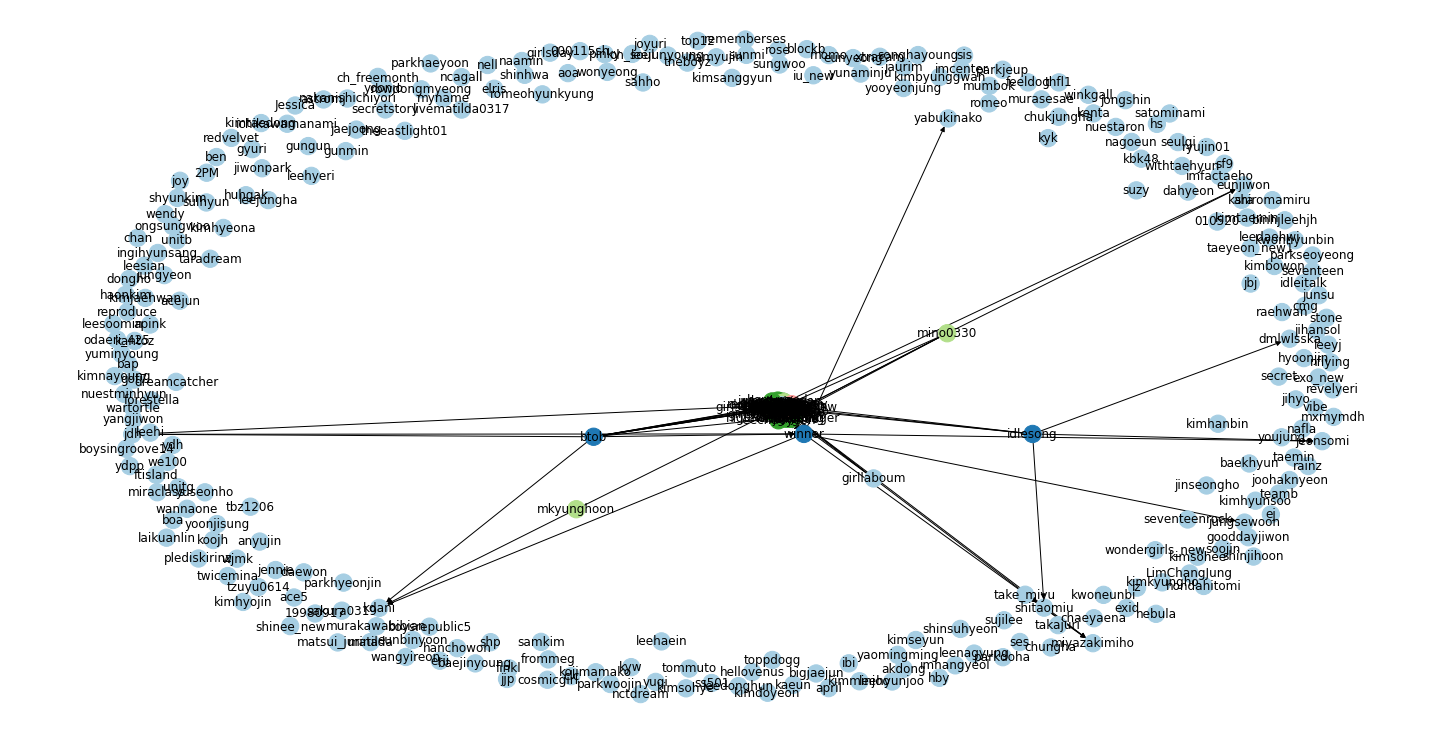

In [94]:
# build color palette for plotting
unique_roles = sorted(set(node_roles_2.values()))
color_map = sns.color_palette('Paired', n_colors=len(unique_roles))
# map roles to colors
role_colors = {role: color_map[i] for i, role in enumerate(unique_roles)}
# build list of colors for all nodes in G
node_colors = [role_colors[node_roles_2[node]] for node in G2.nodes]

# plot graph
plt.figure(figsize=(20,10))
nx.draw(
    G2,
    pos=nx.spring_layout(G2, seed=42),
    with_labels=True,
    node_color=node_colors,
)
plt.show()

In [95]:
print('\nNode role assignments:')
pprint(node_roles_2)

print('\nNode role membership by percentage:')
print(role_extractor.role_percentage.round(2))


Node role assignments:
{'000115sh': 'role_0',
 '010520': 'role_0',
 '19980917': 'role_0',
 '2PM': 'role_0',
 '6kies': 'role_3',
 'Jessica': 'role_0',
 'LimChangJung': 'role_0',
 'ace5': 'role_0',
 'acejun': 'role_0',
 'ahnhyungsub': 'role_3',
 'akdong': 'role_0',
 'anyujin': 'role_0',
 'aoa': 'role_0',
 'apink': 'role_0',
 'april': 'role_0',
 'astro': 'role_3',
 'astromj': 'role_0',
 'b1a4': 'role_2',
 'baejinyoung': 'role_0',
 'baekhyun': 'role_0',
 'bap': 'role_0',
 'ben': 'role_0',
 'berrygood': 'role_3',
 'bigbang': 'role_4',
 'bigjaejun': 'role_0',
 'binhjleehjh': 'role_0',
 'blackpink': 'role_3',
 'blockb': 'role_0',
 'boa': 'role_0',
 'boysingroove14': 'role_0',
 'boysrepublic5': 'role_0',
 'btob': 'role_1',
 'bts': 'role_1',
 'buzz': 'role_3',
 'ch_freemonth': 'role_0',
 'chaeyaena': 'role_0',
 'chan': 'role_0',
 'chukjungha': 'role_0',
 'chungha': 'role_0',
 'clc': 'role_0',
 'cmg': 'role_0',
 'cosmicgirl': 'role_0',
 'daewon': 'role_0',
 'dahyeon': 'role_0',
 'day6': 'role_1

In [96]:
# G1, G2가 다른 role인 팬덤명을 모아놓은 리스트
role_diff = []

for id in list(nodes['fandom_id']):
    if node_roles_1[id] != node_roles_2[id]:
        role_diff.append(id)
print(role_diff)

['6kies', 'ahnhyungsub', 'anyujin', 'apink', 'astro', 'b1a4', 'berrygood', 'blackpink', 'boa', 'buzz', 'ch_freemonth', 'chungha', 'day6', 'dickpunks', 'dmlwlsska', 'doakim', 'doitamazing7', 'dongbang_new', 'fortediquattro', 'fromis', 'gf', 'girlsofthemonth', 'god', 'godgayoung', 'goldenchild', 'got7vlive', 'guckkasten', 'gx9', 'haonkim', 'highfiveofteenager', 'hotshot', 'idlesong', 'in2it', 'infinite', 'ioi', 'iu_tv', 'jjy', 'jsh', 'jungchaeyeon', 'jungsewoon', 'jungyeon', 'kanghyewon', 'kgkg', 'kimchaewon', 'kimdonghan', 'kimsejeong', 'ksy', 'ladiescode', 'leechaeyeon', 'lovelyz', 'madewg', 'mamamoo', 'mino0330', 'mmld', 'nojisun', 'nuest', 'ohmygirl', 'onf', 'pentagon', 'pjb', 'pledis', 'pushkang', 'real__izo', 'sakura0319', 'samkim', 'sanarang', 'shinhwa', 'sonamoo', 'taewookim', 'taeyeon_new1', 'tj3579', 'twice', 'unitb', 'vikon', 'wekimeki', 'wheesung', 'wjsnvlive', 'woojinyoung', 'yuseonho', 'zico']


In [97]:
diff_role = nodes[[id in role_diff for id in list(nodes['fandom_id'])]]
diff_role_var = list(diff_role['nov_support']-diff_role['dec_support'])
print(diff_role_var) # 서로 다른 role인 팬덤들의 support 값의 변화

[1166, 1846, 220, 990, 932, 112, -2232, 5752, 1981, -175, 3195, 1181, -1554, -172, 444, 886, 762, -1083, 616, 2509, 3260, 3884, -367, -1091, 352, -624, 3242, 7768, 892, -244, 3153, 1040, -515, 138, 210, 1769, 197, 5319, -556, 340, 597, 153, 249, 298, 3145, 418, -126, -2889, -108, 7968, 3252, 8754, 2598, 304, 980, 9839, 3463, -566, -96, 1296, 933, -350, 6568, 246, 1962, -523, 1115, -1400, -1405, 443, 1718, 6027, 1357, 4823, -820, 732, 498, -1802, 2980, 5554]


In [98]:
same_role = nodes[[id not in role_diff for id in list(nodes['fandom_id'])]]
same_role_var = list(same_role['nov_support']-same_role['dec_support'])
print(same_role_var) # 같은 role인 팬덤들의 support 값의 변화

[-10, 4, 155, -1, -306, 182, 108, 0, -33, -63, 9, -461, 402, 459, -7, 45, 2469, 0, 0, 19, 0, 0, 6097, 2364, 361, -1, 0, 188, 1773, 628, 0, 32, 2023, 28, 133, 786, 106, 0, 45, 88, 855, 49, 0, 0, 176, 46, 186, -2648, 155, 202, 0, 78, 104, 0, -1158, -98, 0, 346, 949, 302, 1, -5, 141, 1, 2, 0, -1, 0, 0, 3558, 37, 49, 214, 0, 482, 665, -6, 198, 0, -72, 37, 255, -588, 202, -15, -72, 375, -169, -6, 4, 0, 14, -764, 108, 1174, 0, 0, -155, 0, 62, 0, 0, 351, -32, 550, 858, 109, 0, 1135, -27, 15, 2, 34, 158, -128, 173, 216, 1787, 446, 1336, 450, 184, 395, 41, -4, 0, 71, 6, 183, -15, 226, -8, 3, 0, 227, 82, 332, 334, 467, -30, 12, 2662, 1, -107, 13, 2, 31, -298, 108, 0, 3038, 903, 118, 199, 335, 357, -1, 12, 899, 490, -25, -48, 0, 181, 1451, 0, 1840, -155, 34, 0, 193, 79, 7, 3523, 1279, 523, -852, 0, 0, -133, 7701, 0, -28, 82, 7, 142, 1, 177, 127, 530, -57, 321, 97, 0, 71, -1, 1029, 0, 0, 41, -7, 0, -387, 4232, -1, -45, 73, 199, 137, -1, 51, 469, -1210, 1, 22, 0, 0, 0, -19, 79, 0, -67, 3, 64, 209, 

In [99]:
diff_role_var = np.array([abs(diff) for diff in diff_role_var])
same_role_var = np.array([abs(same) for same in same_role_var])
print(np.sum(diff_role_var) / diff_role_var.size) # 서로 다른 role인 팬덤들의 support 변화값의 평균
print(np.sum(same_role_var) / same_role_var.size) # 계속 같은 role인 팬덤들의 support 변화값의 평균 --> support값이 많이 변화한 팬덤들이 role이 바뀌는 경우가 많았다.

1889.05
415.828


In [100]:
from networkx.algorithms import community
comp = community.girvan_newman(G1)
communities_1 = tuple(sorted(c) for c in next(comp))

In [101]:
for i, comm_nodes in enumerate(communities_1):
    print('community {}th'.format(i))
    print(comm_nodes, end='\n')

community 0th
['000115sh']
community 1th
['010520']
community 2th
['19980917']
community 3th
['2PM']
community 4th
['6kies', 'apink', 'bigbang', 'blackpink', 'btob', 'bts', 'ch_freemonth', 'chungha', 'day6', 'fromis', 'gf', 'girlsgeneration_new', 'girlsofthemonth', 'got7vlive', 'guckkasten', 'gx9', 'haonkim', 'idlesong', 'iu_tv', 'jsh', 'jungyeon', 'kimdonghan', 'lovelyz', 'madewg', 'mamamoo', 'mkyunghoon', 'mmld', 'nuest', 'ohmygirl', 'pjb', 'real__izo', 'redvelvetreveluv', 'roykim', 'straykids', 'tj3579', 'twice', 'vikon', 'winner', 'zico']
community 5th
['Jessica']
community 6th
['LimChangJung']
community 7th
['ace5']
community 8th
['acejun']
community 9th
['ahnhyungsub', 'anyujin', 'boa', 'buzz', 'dmlwlsska', 'highfiveofteenager', 'jjy', 'jungsewoon', 'kgkg', 'kim', 'kimsejeong', 'miyazakimiho', 'nth0510', 'onairpril', 'paka', 'sakura0319', 'samkim', 'shinhwa', 'taeyeon_new1', 'unitb', 'wannaonego', 'wheesung', 'yuseonho']
community 10th
['akdong']
community 11th
['aoa']
community 

In [102]:
from networkx.algorithms import community
comp = community.girvan_newman(G2)
communities_2 = tuple(sorted(c) for c in next(comp))

In [103]:
for i, comm_nodes in enumerate(communities_2):
    print('community {}th'.format(i))
    print(comm_nodes, end='\n')

community 0th
['000115sh']
community 1th
['010520']
community 2th
['19980917']
community 3th
['2PM']
community 4th
['6kies', 'ahnhyungsub', 'astro', 'b1a4', 'berrygood', 'bigbang', 'blackpink', 'btob', 'bts', 'buzz', 'day6', 'dickpunks', 'dmlwlsska', 'doakim', 'doitamazing7', 'dongbang_new', 'eunjiwon', 'fortediquattro', 'fromis', 'gf', 'girllaboum', 'girlsgeneration_new', 'girlsofthemonth', 'god', 'godgayoung', 'goldenchild', 'got7vlive', 'guckkasten', 'gx9', 'highfiveofteenager', 'highlight', 'hotshot', 'idlesong', 'in2it', 'infinite', 'ioi', 'iu_tv', 'jdh', 'jeonsomi', 'jjy', 'jsh', 'jungchaeyeon', 'jungsewoon', 'kanghyewon', 'kdani', 'kgkg', 'kim', 'kimchaewon', 'kimdonghan', 'kimsejeong', 'ksy', 'ladiescode', 'leechaeyeon', 'lovelyz', 'madewg', 'mamamoo', 'mino0330', 'mkyunghoon', 'mmld', 'nojisun', 'nth0510', 'nuest', 'ohmygirl', 'onairpril', 'onf', 'paka', 'pentagon', 'pjb', 'pledis', 'pushkang', 'real__izo', 'redvelvetreveluv', 'roykim', 'sanarang', 'shitaomiu', 'sonamoo', 'str

In [104]:
# G1과 G2가 서로 다른 커뮤니티인 팬덤명을 모아놓은 리스트
comm_diff = []

for id in list(nodes['fandom_id']):
    for j1, com in enumerate(communities_1):
        if id in com:
            index_1 = j1
            com1 = com
    for j2, com in enumerate(communities_2):
        if id in com:
            index_2 = j2
            com2 = com
    if com1 != com2:
        comm_diff.append(id)

print(comm_diff)

['6kies', 'ahnhyungsub', 'anyujin', 'apink', 'astro', 'b1a4', 'berrygood', 'bigbang', 'blackpink', 'boa', 'btob', 'bts', 'buzz', 'ch_freemonth', 'chungha', 'day6', 'dickpunks', 'dmlwlsska', 'doakim', 'doitamazing7', 'dongbang_new', 'eunjiwon', 'fortediquattro', 'fromis', 'gf', 'girllaboum', 'girlsgeneration_new', 'girlsofthemonth', 'god', 'godgayoung', 'goldenchild', 'got7vlive', 'guckkasten', 'gx9', 'haonkim', 'highfiveofteenager', 'highlight', 'hotshot', 'idlesong', 'in2it', 'infinite', 'ioi', 'iu_tv', 'jdh', 'jeonsomi', 'jjy', 'jsh', 'jungchaeyeon', 'jungsewoon', 'jungyeon', 'kanghyewon', 'kdani', 'kgkg', 'kim', 'kimchaewon', 'kimdonghan', 'kimsejeong', 'ksy', 'ladiescode', 'leechaeyeon', 'lovelyz', 'madewg', 'mamamoo', 'mino0330', 'miyazakimiho', 'mkyunghoon', 'mmld', 'nojisun', 'nth0510', 'nuest', 'ohmygirl', 'onairpril', 'onf', 'paka', 'pentagon', 'pjb', 'pledis', 'pushkang', 'real__izo', 'redvelvetreveluv', 'roykim', 'sakura0319', 'samkim', 'sanarang', 'shinhwa', 'shitaomiu', 's

In [105]:
diff_comm = nodes[[id in comm_diff for id in list(nodes['fandom_id'])]]
diff_comm_var = list(diff_comm['nov_support']-diff_comm['dec_support'])
print(diff_comm_var) # 서로 다른 커뮤니티인 팬덤들의 support 변화 값

[1166, 1846, 220, 990, 932, 112, -2232, 2469, 5752, 1981, 6097, 2364, -175, 3195, 1181, -1554, -172, 444, 886, 762, -1083, 45, 616, 2509, 3260, -2648, 202, 3884, -367, -1091, 352, -624, 3242, 7768, 892, -244, 949, 3153, 1040, -515, 138, 210, 1769, 665, 198, 197, 5319, -556, 340, 597, 153, -764, 249, 1174, 298, 3145, 418, -126, -2889, -108, 7968, 3252, 8754, 2598, 82, 332, 304, 980, 199, 9839, 3463, 899, -566, -25, -96, 1296, 933, -350, 6568, 3523, 7701, 246, 1962, -523, 1115, -1, -1400, 4232, -1405, 443, 469, 1718, 6027, 1357, 4823, 8888, -820, 732, 2939, 498, -1802, 357, 2980, 5554]


In [106]:
same_comm = nodes[[id not in comm_diff for id in list(nodes['fandom_id'])]]
same_comm_var = list(same_comm['nov_support']-same_comm['dec_support'])
print(same_comm_var) # 계속 같은 커뮤니티인 팬덤들의 support 변화 값

[-10, 4, 155, -1, -306, 182, 108, 0, -33, -63, 9, -461, 402, 459, -7, 45, 0, 0, 19, 0, 0, 361, -1, 0, 188, 1773, 628, 0, 32, 2023, 28, 133, 786, 106, 0, 88, 855, 49, 0, 0, 176, 46, 186, 155, 0, 78, 104, 0, -1158, -98, 0, 346, 302, 1, -5, 141, 1, 2, 0, -1, 0, 0, 3558, 37, 49, 214, 0, 482, -6, 0, -72, 37, 255, -588, 202, -15, -72, 375, -169, -6, 4, 0, 14, 108, 0, 0, -155, 0, 62, 0, 0, 351, -32, 550, 858, 109, 0, 1135, -27, 15, 2, 34, 158, -128, 173, 216, 1787, 446, 1336, 450, 184, 395, 41, -4, 0, 71, 6, 183, -15, 226, -8, 3, 0, 227, 334, 467, -30, 12, 2662, 1, -107, 13, 2, 31, -298, 108, 0, 3038, 903, 118, 335, 357, -1, 12, 490, -48, 0, 181, 1451, 0, 1840, -155, 34, 0, 193, 79, 7, 1279, 523, -852, 0, 0, -133, 0, -28, 82, 7, 142, 1, 177, 127, 530, -57, 321, 97, 0, 71, 1029, 0, 0, 41, -7, 0, -387, -1, -45, 73, 199, 137, -1, 51, -1210, 1, 22, 0, 0, 0, -19, 79, 0, -67, 3, 64, 209, -1, 6, 1202, 336, 2651, 402, 525, 0, 0, -55, 517, 1, 0, 68, 0, 158, -1, 946, 685, 0, -32, 5]


In [107]:
diff_comm_var = np.array([abs(diff) for diff in diff_comm_var])
same_comm_var = np.array([abs(same) for same in same_comm_var])
print(np.sum(diff_comm_var) / diff_comm_var.size) # 서로 다른 커뮤니티인 팬덤들의 support 변화값의 평균
print(np.sum(same_comm_var) / same_comm_var.size) # 계속 같은 커뮤니티인 팬덤들의 support 변화값의 평균 --> support값이 많이 변화한 팬덤들이 커뮤니티가 바뀌는 경우가 많았다.

1907.173076923077
251.03982300884957


- 3) G1과 G2의 pagerank 및 degree centrality를 구하고, G1에서 역할을 많이 하였던 팬덤들이 G2에서도 여전히 역할을 많이 하는지 분석하라
    - 11월과 12월의 support 수를 pagerank와 degree centrality를 구하여 나타냈다.

In [108]:
pagerank1 = nx.pagerank(G1)
pagerank1

{'000115sh': 0.0016322997773879973,
 '010520': 0.0016322997773879973,
 '19980917': 0.0016322997773879973,
 '2PM': 0.0016322997773879973,
 '6kies': 0.010123840735341104,
 'Jessica': 0.0016322997773879973,
 'LimChangJung': 0.0016322997773879973,
 'ace5': 0.0016322997773879973,
 'acejun': 0.0016322997773879973,
 'ahnhyungsub': 0.0035436368418336616,
 'akdong': 0.0016322997773879973,
 'anyujin': 0.0016322997773879973,
 'aoa': 0.0016322997773879973,
 'apink': 0.003417312840447885,
 'april': 0.0016322997773879973,
 'astro': 0.0016322997773879973,
 'astromj': 0.0016322997773879973,
 'b1a4': 0.0016322997773879973,
 'baejinyoung': 0.0016322997773879973,
 'baekhyun': 0.0016322997773879973,
 'bap': 0.0016322997773879973,
 'ben': 0.0016322997773879973,
 'berrygood': 0.0016322997773879973,
 'bigbang': 0.0016322997773879973,
 'bigjaejun': 0.0016322997773879973,
 'binhjleehjh': 0.0016322997773879973,
 'blackpink': 0.009902033942085647,
 'blockb': 0.0016322997773879973,
 'boa': 0.0016322997773879973,


In [109]:
degree_centrality1 = nx.degree_centrality(G1)
degree_centrality1

{'000115sh': 0.0,
 '010520': 0.0,
 '19980917': 0.0,
 '2PM': 0.0,
 '6kies': 0.015197568389057751,
 'Jessica': 0.0,
 'LimChangJung': 0.0,
 'ace5': 0.0,
 'acejun': 0.0,
 'ahnhyungsub': 0.00911854103343465,
 'akdong': 0.0,
 'anyujin': 0.00303951367781155,
 'aoa': 0.0,
 'apink': 0.0060790273556231,
 'april': 0.0,
 'astro': 0.0,
 'astromj': 0.0,
 'b1a4': 0.0,
 'baejinyoung': 0.0,
 'baekhyun': 0.0,
 'bap': 0.0,
 'ben': 0.0,
 'berrygood': 0.0,
 'bigbang': 0.015197568389057751,
 'bigjaejun': 0.0,
 'binhjleehjh': 0.0,
 'blackpink': 0.02735562310030395,
 'blockb': 0.0,
 'boa': 0.00303951367781155,
 'boysingroove14': 0.0,
 'boysrepublic5': 0.0,
 'btob': 0.0364741641337386,
 'bts': 0.060790273556231005,
 'buzz': 0.0060790273556231,
 'ch_freemonth': 0.03951367781155015,
 'chaeyaena': 0.0,
 'chan': 0.0,
 'chukjungha': 0.0,
 'chungha': 0.00911854103343465,
 'clc': 0.0,
 'cmg': 0.0,
 'cosmicgirl': 0.0,
 'daewon': 0.0,
 'dahyeon': 0.0,
 'day6': 0.0182370820668693,
 'dickpunks': 0.0,
 'dmlwlsska': 0.0030

In [110]:
pagerank2 = nx.pagerank(G2)
pagerank2

{'000115sh': 0.001380912237299157,
 '010520': 0.001380912237299157,
 '19980917': 0.001380912237299157,
 '2PM': 0.001380912237299157,
 '6kies': 0.006368782945823343,
 'Jessica': 0.001380912237299157,
 'LimChangJung': 0.001380912237299157,
 'ace5': 0.001380912237299157,
 'acejun': 0.001380912237299157,
 'ahnhyungsub': 0.0015753071553257002,
 'akdong': 0.001380912237299157,
 'anyujin': 0.001380912237299157,
 'aoa': 0.001380912237299157,
 'apink': 0.001380912237299157,
 'april': 0.001380912237299157,
 'astro': 0.001380912237299157,
 'astromj': 0.001380912237299157,
 'b1a4': 0.001380912237299157,
 'baejinyoung': 0.001380912237299157,
 'baekhyun': 0.001380912237299157,
 'bap': 0.001380912237299157,
 'ben': 0.001380912237299157,
 'berrygood': 0.001380912237299157,
 'bigbang': 0.001589630991390814,
 'bigjaejun': 0.001380912237299157,
 'binhjleehjh': 0.001380912237299157,
 'blackpink': 0.005268042857744112,
 'blockb': 0.001380912237299157,
 'boa': 0.001380912237299157,
 'boysingroove14': 0.0013

In [111]:
degree_centrality2 = nx.degree_centrality(G2)
degree_centrality2

{'000115sh': 0.0,
 '010520': 0.0,
 '19980917': 0.0,
 '2PM': 0.0,
 '6kies': 0.0182370820668693,
 'Jessica': 0.0,
 'LimChangJung': 0.0,
 'ace5': 0.0,
 'acejun': 0.0,
 'ahnhyungsub': 0.00911854103343465,
 'akdong': 0.0,
 'anyujin': 0.0,
 'aoa': 0.0,
 'apink': 0.0,
 'april': 0.0,
 'astro': 0.0060790273556231,
 'astromj': 0.0,
 'b1a4': 0.00303951367781155,
 'baejinyoung': 0.0,
 'baekhyun': 0.0,
 'bap': 0.0,
 'ben': 0.0,
 'berrygood': 0.00303951367781155,
 'bigbang': 0.0121580547112462,
 'bigjaejun': 0.0,
 'binhjleehjh': 0.0,
 'blackpink': 0.0121580547112462,
 'blockb': 0.0,
 'boa': 0.0,
 'boysingroove14': 0.0,
 'boysrepublic5': 0.0,
 'btob': 0.03343465045592705,
 'bts': 0.1276595744680851,
 'buzz': 0.00303951367781155,
 'ch_freemonth': 0.0,
 'chaeyaena': 0.0,
 'chan': 0.0,
 'chukjungha': 0.0,
 'chungha': 0.0,
 'clc': 0.0,
 'cmg': 0.0,
 'cosmicgirl': 0.0,
 'daewon': 0.0,
 'dahyeon': 0.0,
 'day6': 0.03343465045592705,
 'dickpunks': 0.00303951367781155,
 'dmlwlsska': 0.00303951367781155,
 'doa

In [112]:
pr_sort1 = sorted(pagerank1.items(), key=lambda x: x[1], reverse=True)
pr_sort2 = sorted(pagerank2.items(), key=lambda x: x[1], reverse=True)
dc_sort1 = sorted(degree_centrality1.items(), key=lambda x: x[1], reverse=True)
dc_sort2 = sorted(degree_centrality2.items(), key=lambda x: x[1], reverse=True)

In [113]:
#pagerank 상위 10개 팀 중 'wannaonego', 'jsh', 'nuest', 'roykim', 'lovelyz', 'gf', 'twice' 공통

print(pr_sort1[0:10])
print(pr_sort2[0:10])

[('wannaonego', 0.08475880193597589), ('real__izo', 0.049287587685756), ('jsh', 0.03170695116818778), ('nuest', 0.031154880035167226), ('winner', 0.029691811282706433), ('roykim', 0.027027068524602817), ('lovelyz', 0.024773390824142327), ('ohmygirl', 0.02168904293071732), ('gf', 0.020508313023360078), ('twice', 0.01873781566809945)]
[('lovelyz', 0.09201961326985812), ('bts', 0.08196914421634231), ('jsh', 0.06201598969784658), ('wannaonego', 0.053092765162630076), ('fromis', 0.04585409046708847), ('nuest', 0.0369437969900603), ('gf', 0.035877249604368035), ('twice', 0.02511767586811377), ('highfiveofteenager', 0.0203667718876267), ('roykim', 0.020039854002002786)]


In [114]:
#11월과 12일 pagerank 합쳐서 확인
total_pr = pagerank1
total_pr.update(pagerank2)
total_pr = sorted(total_pr.items(), key=lambda x: x[1], reverse=True)

In [115]:
total_pr

[('lovelyz', 0.09201961326985812),
 ('bts', 0.08196914421634231),
 ('jsh', 0.06201598969784658),
 ('wannaonego', 0.053092765162630076),
 ('fromis', 0.04585409046708847),
 ('nuest', 0.0369437969900603),
 ('gf', 0.035877249604368035),
 ('twice', 0.02511767586811377),
 ('highfiveofteenager', 0.0203667718876267),
 ('roykim', 0.020039854002002786),
 ('ohmygirl', 0.017231799395962012),
 ('mamamoo', 0.012985854603564623),
 ('real__izo', 0.012290250075795005),
 ('miyazakimiho', 0.008176841714300742),
 ('leechaeyeon', 0.007771519361041706),
 ('vikon', 0.006523719473967892),
 ('winner', 0.006502602941824175),
 ('6kies', 0.006368782945823343),
 ('jdh', 0.006368327796409471),
 ('eunjiwon', 0.0060672967190841),
 ('blackpink', 0.005268042857744112),
 ('kdani', 0.002286999644821839),
 ('kim', 0.0022051326509484725),
 ('shitaomiu', 0.00199882754547019),
 ('jeonsomi', 0.0018486239858417006),
 ('jungsewoon', 0.0016060010897509438),
 ('doakim', 0.0015937235159808464),
 ('bigbang', 0.001589630991390814),


In [116]:
# pagerank의 변화
pr_var = []
for pr1 in pr_sort1:
    for pr2 in pr_sort2:
        if pr1[0] == pr2[0]:
            pr_var.append([pr1[0], pr2[1] - pr1[1]])
            break

In [117]:
pr_var

[['wannaonego', -0.03166603677334581],
 ['real__izo', -0.036997337609961],
 ['jsh', 0.0303090385296588],
 ['nuest', 0.0057889169548930725],
 ['winner', -0.02318920834088226],
 ['roykim', -0.006987214522600031],
 ['lovelyz', 0.06724622244571579],
 ['ohmygirl', -0.004457243534755309],
 ['gf', 0.015368936581007957],
 ['twice', 0.006379860200014322],
 ['mamamoo', -0.005725662117298722],
 ['fromis', 0.0275887294445759],
 ['bts', 0.0656897592429285],
 ['vikon', -0.009322165945200382],
 ['ch_freemonth', -0.01438605488555669],
 ['day6', -0.013081402777548306],
 ['6kies', -0.003755057789517761],
 ['blackpink', -0.004633991084341534],
 ['btob', -0.005927247329904467],
 ['got7vlive', -0.005473450135589976],
 ['straykids', -0.005137696320109001],
 ['girlsofthemonth', -0.004456019398083232],
 ['miyazakimiho', 0.003089053088426658],
 ['madewg', -0.0036752053529780144],
 ['ahnhyungsub', -0.001968329686507961],
 ['apink', -0.002036400603148728],
 ['highfiveofteenager', 0.017388846878085864],
 ['000115

In [118]:
# degree centrality 상위 10개 팀 중 'wannaonego', 'jsh', 'nuest', 'winner', 'lovelyz', 'bts', 'twice' 공통

print(dc_sort1[0:10])
print(dc_sort2[0:10])

[('wannaonego', 0.1702127659574468), ('nuest', 0.0851063829787234), ('real__izo', 0.0790273556231003), ('winner', 0.0729483282674772), ('mamamoo', 0.0668693009118541), ('roykim', 0.06382978723404255), ('bts', 0.060790273556231005), ('jsh', 0.060790273556231005), ('lovelyz', 0.057750759878419454), ('twice', 0.05167173252279635)]
[('lovelyz', 0.17325227963525835), ('bts', 0.1276595744680851), ('wannaonego', 0.0972644376899696), ('winner', 0.08206686930091185), ('twice', 0.06382978723404255), ('jsh', 0.05167173252279635), ('fromis', 0.0486322188449848), ('gf', 0.0486322188449848), ('nuest', 0.04559270516717325), ('btob', 0.03343465045592705)]


In [119]:
#11월과 12일 degree_centrality 합쳐서 확인
total_dc = degree_centrality1
total_dc.update(degree_centrality2)
total_dc = sorted(total_dc.items(), key=lambda x: x[1], reverse=True)
total_dc

[('lovelyz', 0.17325227963525835),
 ('bts', 0.1276595744680851),
 ('wannaonego', 0.0972644376899696),
 ('winner', 0.08206686930091185),
 ('twice', 0.06382978723404255),
 ('jsh', 0.05167173252279635),
 ('fromis', 0.0486322188449848),
 ('gf', 0.0486322188449848),
 ('nuest', 0.04559270516717325),
 ('btob', 0.03343465045592705),
 ('day6', 0.03343465045592705),
 ('roykim', 0.03343465045592705),
 ('got7vlive', 0.030395136778115502),
 ('mamamoo', 0.030395136778115502),
 ('vikon', 0.030395136778115502),
 ('highfiveofteenager', 0.0243161094224924),
 ('real__izo', 0.0243161094224924),
 ('ohmygirl', 0.02127659574468085),
 ('6kies', 0.0182370820668693),
 ('idlesong', 0.0182370820668693),
 ('highlight', 0.015197568389057751),
 ('mino0330', 0.015197568389057751),
 ('bigbang', 0.0121580547112462),
 ('blackpink', 0.0121580547112462),
 ('girllaboum', 0.0121580547112462),
 ('iu_tv', 0.0121580547112462),
 ('kim', 0.0121580547112462),
 ('madewg', 0.0121580547112462),
 ('shitaomiu', 0.0121580547112462),
 (

In [120]:
# degree centrality의 변화
dc_var = []
for dc1 in dc_sort1:
    for dc2 in dc_sort2:
        if dc1[0] == dc2[0]:
            dc_var.append([dc1[0], dc2[1] - dc1[1]])
            break
dc_var #dc_var를 통해 1달 사이의 degree centrality 변화값을 알 수 있다.

[['wannaonego', -0.0729483282674772],
 ['nuest', -0.03951367781155015],
 ['real__izo', -0.054711246200607896],
 ['winner', 0.009118541033434652],
 ['mamamoo', -0.03647416413373859],
 ['roykim', -0.0303951367781155],
 ['bts', 0.06686930091185408],
 ['jsh', -0.009118541033434652],
 ['lovelyz', 0.1155015197568389],
 ['twice', 0.012158054711246195],
 ['ohmygirl', -0.02735562310030395],
 ['vikon', -0.0182370820668693],
 ['gf', 0.006079027355623101],
 ['ch_freemonth', -0.03951367781155015],
 ['btob', -0.0030395136778115506],
 ['fromis', 0.015197568389057753],
 ['straykids', -0.021276595744680847],
 ['got7vlive', 0.0],
 ['blackpink', -0.015197568389057751],
 ['gx9', -0.0243161094224924],
 ['madewg', -0.015197568389057751],
 ['zico', -0.018237082066869303],
 ['girlsofthemonth', -0.0182370820668693],
 ['day6', 0.01519756838905775],
 ['6kies', 0.003039513677811549],
 ['bigbang', -0.0030395136778115506],
 ['kimdonghan', -0.0121580547112462],
 ['iu_tv', 0.0],
 ['tj3579', -0.0030395136778115506],
 

### Implication 분석

##### 6. 팬덤간의 도움 현상이 음원 차트에 미치는 영향에 대해 분석하라
- 가수 이름은 같은데 팬덤 이름이 달라 구분되어 support가 계산되었는데, 여기서는 가수명이 같으면 같은 그룹으로 묶여야 하므로, nodes에서 fandom_name이 같으면 support 값들을 합쳐주는 작업을 거쳤다. 결과적으로 330개의 row에서 314개로 중복된 행들이 줄었다.

In [121]:
nodes

,fandom_id,fandom_name,nov_post,dec_post,nov_support,dec_support,type,total,supporting,supported
0,000115sh,KIM SU-HYUN,68,159,0,10,0,227,10,6
1,010520,MOE GOTO / AKB48,1998,1760,179,175,0,3758,354,177
2,19980917,KIM DONG-HYUN / MXM,718,423,349,194,1,1141,543,117
3,2PM,2PM,0,1,0,1,1,1,1,0
4,6kies,SECHSKIES (disbanded),24502,16726,2981,1815,1,41228,4796,13565
...,...,...,...,...,...,...,...,...,...,...
325,yuminyoung,YU MIN-YOUNG,0,1,0,0,0,1,0,0
326,yunaminju,KHAN,1639,1674,1529,1561,0,3313,3090,4125
327,yuqi,YUQI / (G)I-dle,1252,3012,229,224,0,4264,453,282
328,yuseonho,YOO SEON-HO,6296,3027,3878,898,1,9323,4776,5064


In [122]:
fandom_name = list(nodes['fandom_name']) #fandom_name이 동일한 경우 있음 -> 차트 분석 때는 다르게 처리해주어야 함

In [123]:
nodes_fandom = nodes.drop(['fandom_id', 'nov_post', 'dec_post', 'nov_support', 'dec_support'], axis=1)
nodes_fandom['support'] = nodes['supporting'] + nodes['supported']
nodes_fandom

,fandom_name,type,total,supporting,supported,support
0,KIM SU-HYUN,0,227,10,6,16
1,MOE GOTO / AKB48,0,3758,354,177,531
2,KIM DONG-HYUN / MXM,1,1141,543,117,660
3,2PM,1,1,1,0,1
4,SECHSKIES (disbanded),1,41228,4796,13565,18361
...,...,...,...,...,...,...
325,YU MIN-YOUNG,0,1,0,0,0
326,KHAN,0,3313,3090,4125,7215
327,YUQI / (G)I-dle,0,4264,453,282,735
328,YOO SEON-HO,1,9323,4776,5064,9840


In [124]:
# 가수 명이 동일한데 다른 팬덤을 가진 경우가 있으므로 같은 가수는 같은 팬덤으로 취급하기 위함

once_check = []
for i, fan1 in enumerate(fandom_name):
    fan_tmp = [i]
    for j, fan2 in enumerate(fandom_name):
        if i != j and fan1 == fan2:
            fan_tmp.append(j)
            once_check.append(j)
    if len(fan_tmp) != 1 and (i not in once_check):
        plus = [0,0,0,0]
        for f in fan_tmp:
            plus[0] += nodes_fandom.loc[f]['total']
            plus[1] += nodes_fandom.loc[f]['supporting']
            plus[2] += nodes_fandom.loc[f]['supported']
            plus[3] += nodes_fandom.loc[f]['support']
        nodes_fandom.at[f, 'total'] = plus[0]
        nodes_fandom.at[f, 'supporting'] = plus[1]
        nodes_fandom.at[f, 'supported'] = plus[2]
        nodes_fandom.at[f, 'support'] = plus[3]
        nodes_fandom = nodes_fandom.drop(index=f, axis=0)

In [125]:
nodes_fandom # 제대로 처리된 모습 이제 중복 없음 330->314

,fandom_name,type,total,supporting,supported,support
0,KIM SU-HYUN,0,227,10,6,16
1,MOE GOTO / AKB48,0,3758,354,177,531
2,KIM DONG-HYUN / MXM,1,1141,543,117,660
3,2PM,1,1,1,0,1
4,SECHSKIES (disbanded),1,41228,4796,13565,18361
...,...,...,...,...,...,...
325,YU MIN-YOUNG,0,1,0,0,0
326,KHAN,0,3313,3090,4125,7215
327,YUQI / (G)I-dle,0,4264,453,282,735
328,YOO SEON-HO,1,9323,4776,5064,9840


In [126]:
import math

In [127]:
#전체, supporting, supported가 많은 순으로 정렬해서 이름 순으로 리스트

total_fanname = nodes_fandom.sort_values(by='support')
total_fanname = list(total_fanname['fandom_name'])

ing_fanname = nodes_fandom.sort_values(by='supporting')
ing_fanname = list(ing_fanname['fandom_name'])

ed_fanname = nodes_fandom.sort_values(by='supported')
ed_fanname = list(ed_fanname['fandom_name'])

In [128]:
# 차트에 있는 경우에 차트 순위, 차트에 몇 달동안 올라와 있었는지를 고려해서 y값을 만들었음

chart_support = [[], []]
for name in total_fanname:
    chart = monthly_chart[monthly_chart['artist'].str.contains(name)]
    if not chart.empty:
        rank = list(chart['rank'])
        ave_rank = sum(rank) / len(rank) #평균 랭킹
        result = (1/ave_rank) * len(rank) # 1/순위 * 랭킹나온수
        chart_support[0].append(name)
        chart_support[1].append(result)

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


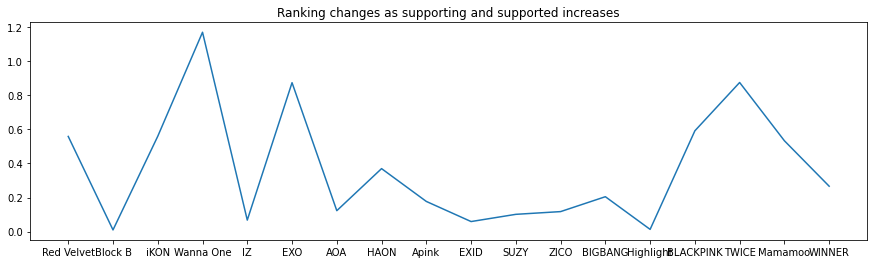

In [129]:
plt.figure(figsize=(15,4))
plt.plot(chart_support[0], chart_support[1])
plt.title('Ranking changes as supporting and supported increases')
plt.show()

In [130]:
chart_ing = [[], []]
for name in ing_fanname:
    chart = monthly_chart[monthly_chart['artist'].str.contains(name)]
    if not chart.empty:
        rank = list(chart['rank'])
        ave_rank = sum(rank) / len(rank) #평균 랭킹
        result = (1/ave_rank) * len(rank) # 1/순위 * 랭킹나온수 * supporting수
        chart_ing[0].append(name)
        chart_ing[1].append(result)

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [131]:
print(chart_ing)

[['Red Velvet', 'Block B', 'iKON', 'Wanna One', 'IZ', 'EXO', 'AOA', 'HAON', 'Apink', 'SUZY', 'EXID', 'BIGBANG', 'ZICO', 'Highlight', 'BLACKPINK', 'Mamamoo', 'TWICE', 'WINNER'], [0.5586776859504132, 0.01020408163265306, 0.5596446700507615, 1.1699251247920133, 0.06779661016949153, 0.873998543335761, 0.12307692307692308, 0.36986301369863017, 0.1773049645390071, 0.1016260162601626, 0.05925925925925926, 0.20502092050209203, 0.11764705882352941, 0.013333333333333334, 0.5916870415647922, 0.5333333333333333, 0.8751300728407908, 0.2666666666666667]]


In [132]:
chart_ed = [[], []]
for name in ed_fanname:
    chart = monthly_chart[monthly_chart['artist'].str.contains(name)]
    if not chart.empty:
        rank = list(chart['rank'])
        ave_rank = sum(rank) / len(rank)
        result = (1/ave_rank) * len(rank) # 1/순위 * 랭킹나온수
        chart_ed[0].append(name)
        chart_ed[1].append(result)

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [133]:
print(chart_ed)

[['iKON', 'IZ', 'Wanna One', 'Block B', 'Red Velvet', 'EXO', 'AOA', 'EXID', 'HAON', 'Apink', 'ZICO', 'SUZY', 'BIGBANG', 'Highlight', 'BLACKPINK', 'TWICE', 'Mamamoo', 'WINNER'], [0.5596446700507615, 0.06779661016949153, 1.1699251247920133, 0.01020408163265306, 0.5586776859504132, 0.873998543335761, 0.12307692307692308, 0.05925925925925926, 0.36986301369863017, 0.1773049645390071, 0.11764705882352941, 0.1016260162601626, 0.20502092050209203, 0.013333333333333334, 0.5916870415647922, 0.8751300728407908, 0.5333333333333333, 0.2666666666666667]]


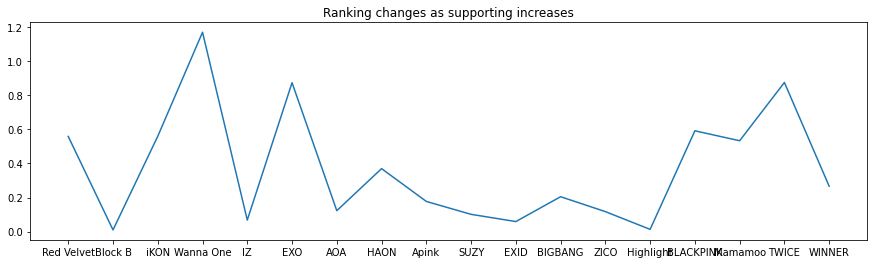

In [134]:
plt.figure(figsize=(15,4))
plt.plot(chart_ing[0], chart_ing[1])
plt.title('Ranking changes as supporting increases')
plt.show()

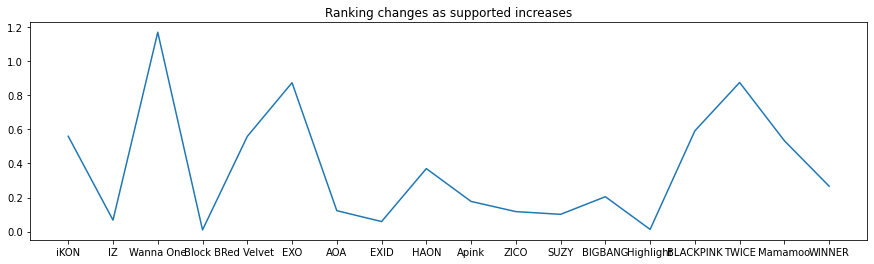

In [135]:
plt.figure(figsize=(15,4))
plt.plot(chart_ed[0], chart_ed[1])
plt.title('Ranking changes as supported increases')
plt.show()

In [136]:
# support한 가수들 중 랭킹에 든 비율 : 5.7%

artist_rank = list(set(chart_ing[0] + chart_ed[0])) #중복없이 supporting+supported
artist_num = list(nodes_fandom['fandom_name'])
print('rate : ', len(artist_rank) / len(artist_num)) # 18/314

rate :  0.05732484076433121


##### 7. (Optional) 팬덤간의 도움 현상의 본질을 이해할 수 있는 추가 분석할 내용이 있으면 분석 문제 정의 및 분석 결과를 기술하라
- 문제 정의 : 같은 소속사인 팬덤은 같은 소속사 팬덤끼리 도움을 주고 받는 경우가 많은가? 어떤 소속사가 서로 도움을 많이 주고 받는가?
- 분석 : 먼저, 소속사들을 agents에 정리해주고, same_agent에 각 소속사에 속하는 아티스트들을 리스트로 정리해주었다. (예 : agents[0]에는 wm이 있고, same_agent[0]에는 [오마이걸, 온앤오프, 비원에이포, 김효진]이 있다.) 같은 소속사에 동료가 없는 경우는 삭제해주었다. 같은 회사끼리 서로를 support하는 경우의 support 횟수를 더해 agent_support에 넣어주었다. 그렇게 계산된 값, 회사명(agents), 회사에 소속된 가수들(same_agent)를 데이터 프레임으로 만들어주었다. 내림차순으로 정렬해 상위 10개의 행만 보았다.

In [137]:
#같은 소속사 찾기
agents = list(set(meta['agent']))
same_agent = [[] for _ in range(len(agents))]

for i in range(len(meta)):
    if meta['agent'][i] in agents:
        same_agent[agents.index(meta['agent'][i])].append(meta['fandom_name'][i])

In [138]:
alone = [] #같은 회사에 동료가 없는 경우
for i, same in enumerate(same_agent):
    if len(same)==1:
        alone.append([i,same])

In [139]:
#같은 회사에 동료가 없는 경우 삭제
for [i, al] in alone:
    same_agent.remove(al)
    agents[i] = 'None'
while 'None' in agents:    
	agents.remove('None')

In [140]:
len(agents), len(same_agent) #2팀이상인 소속사가 47개

(47, 47)

In [141]:
#every entertainment
agent_support = [0 for _ in range(len(same_agent))]

for a in range(len(same_agent)):
    agent = same_agent[a]
    if agent != [] or len(agent) != 1:
        for i in range(len(edges)):
            if (edges['source'][i] in agent) and (edges['target'][i] in agent):
                agent_support[a] += edges['nov_support'][i] + edges['dec_support'][i]

print(agent_support)

[832.0, 38.0, 0, 15.0, 0, 0, 0, 1309.0, 0, 0, 0, 0, 29.0, 122.0, 236.0, 0, 19.0, 0, 0, 0, 0, 138.0, 13.0, 1.0, 0, 865.0, 7695.0, 1407.0, 0, 0, 0, 117.0, 4762.0, 0, 2679.0, 271.0, 0, 3003.0, 206.0, 0, 0, 6.0, 7643.0, 0, 1.0, 16.0, 113.0]


In [142]:
each_agent = pd.DataFrame(agents)
each_agent.columns = ['agent']
each_agent['artists'] = same_agent
each_agent['agent_support'] = agent_support

In [143]:
each_agent.head() #agent_support는 같은 소속사끼리의 support

,agent,artists,agent_support
0,Cube Entertainment,"[hanchowon, idleitalk, pentagon, yuqi, idleson...",832.0
1,Mystic Entertainment,"[jongshin, leesoomin, jjp, 000115sh]",38.0
2,Major 9,"[kimtaedong, vibe, ben]",0.0
3,Plan A Entertainment,"[apink, huhgak, ej]",15.0
4,Cre.ker Entertainment,"[joohaknyeon, tbz1206, theboyz]",0.0


In [144]:
# 같은 소속사끼리 도움을 많이 주고 받는 상위 10개의 소속사와 그 소속사에 속한 아티스트들
each_agent = each_agent.sort_values(by='agent_support', ascending=False)
each_agent.head(10)

,agent,artists,agent_support
26,JYP Entertainment,"[day6, got7, got7vlive, madewg, momo, straykid...",7695.0
42,YG Entertainment,"[6kies, bigbang, blackpink, eunjiwon, jennie, ...",7643.0
32,Off The Record,"[anyujin, fromis, kimchaewon, real__izo, sakur...",4762.0
37,AKS,"[erii, ichikawamanami, kojimamako, sahho, miya...",3003.0
34,Swing Entertainment,"[baejinyoung, kdani, kimjaehwan, laikuanlin, l...",2679.0
27,PLEDIS Entertainment,"[cmg, nuest, pinky, pledis, seventeen, wartort...",1407.0
7,SM Entertainment,"[boa, dongbang_new, exo_new, girlsgeneration_n...",1309.0
25,Woollim Entertainment,"[goldenchild, infinite, lovelyz]",865.0
0,Cube Entertainment,"[hanchowon, idleitalk, pentagon, yuqi, idleson...",832.0
35,Fantagio Music,"[astro, wekimeki, youjung, hellovenus, kimdoye...",271.0


In [145]:
agents = each_agent['agent'].astype(str)

In [146]:
for i in range(len(agents)):
    if 'Entertainment' in agents[i]:
        agents[i] = agents[i].replace('Entertainment', '')

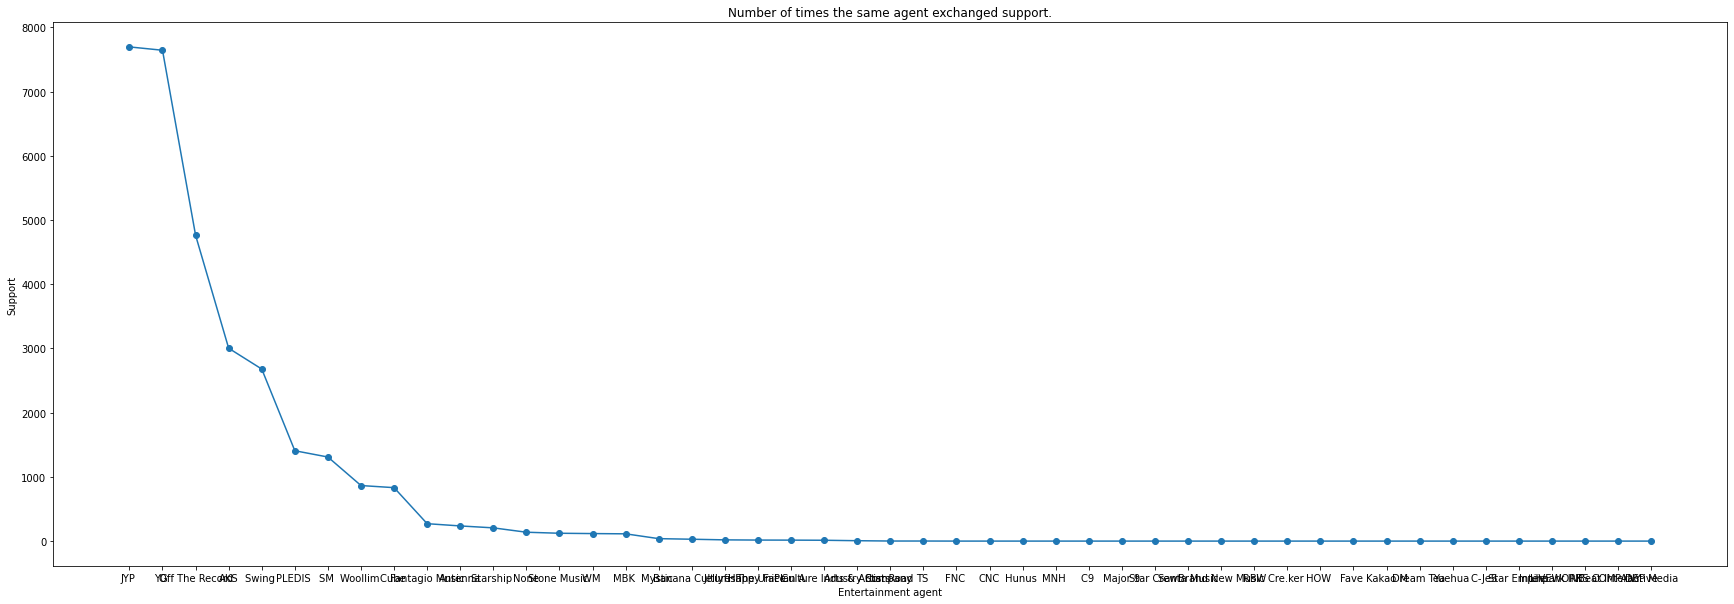

In [147]:
plt.figure(figsize=(30,10))
plt.plot(agents, list(each_agent['agent_support']), 'o-')
plt.xlabel('Entertainment agent')
plt.ylabel('Support')
plt.title('Number of times the same agent exchanged support.')
plt.show()

In [148]:
# 그 이외에
# 앨범이 나온 달(11월이나 12월에 있는 경우)에 supporting과 supported 횟수가 증가하는지 감소하는지? 예상 : supporting은 감소하고, supported는 증가했다.
# 이것도 궁금하지만! 차트에 있는 앨범이 적어(표본이 너무 적어서) 어려울 것 같다. 